# **I. Perkenalan**

Nama : Elang Cergas Pembrani

Objective : **Prediksi klasifikasi credit score customer berdasarkan profil dan aktivitas finansial.**

Saya akan melakukan analisis data credit score untuk melakukan prediksi klasifikasi jenis credit score.
Kemudian saya akan membuat model Machine Learning yang digunakan untuk memprediksi apakah peminjam atau calon peminjam memiliki credit score yang baik.


# **II. Import Libraries**

In [ ]:
## Import Libraries
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill as pickle
import json
import time
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from pprint import pprint
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# **III. Data Loading**

## **Sumber Dataset**

[Credit Score Classification Cleaned Dataset](https://www.kaggle.com/datasets/iremnurtokuroglu/credit-score-classification-cleaned-dataset)

## **A. Import CSV**

Berikut adalah kode import dataset pada file [dataset_credit_score.csv](./dataset_credit_score.csv) dan disimpan pada variabel `df`.

In [ ]:
random_state = 41
pickle.settings['recurse'] = True
dataset_filename = './deployments/src/dataset_credit_score.csv'
df = pd.read_csv(dataset_filename)

## **B. Jumlah Baris dan Kolom**

| Dimensi Dataset 2 |   Jumlah |
| ----------------- | -------: |
| Baris             | `96.696` |
| Kolom             |     `28` |

In [3]:
print('Jumlah baris: {:,.0f}'.format(df.shape[0]).replace(',','.'))
print('Jumlah kolom: {:,.0f}'.format(df.shape[1]))

Jumlah baris: 96.696
Jumlah kolom: 28


## **C. Preview Sampel Data**

### **1. Preview `10` Data Pertama**

In [4]:
df.head(10)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,94,...,9.27,4,Good,809.98,27.262259,No,62.430172,High_spent_Medium_value_payments,340.47922,2
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,95,...,11.27,4,Good,809.98,22.537594,No,178.344070,Low_spent_Small_value_payments,244.56532,2
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,99,...,11.27,4,Good,809.98,23.933794,No,24.785217,High_spent_Medium_value_payments,358.12418,1
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,111,...,5.42,2,Good,605.03,24.464031,No,104.291824,Low_spent_Small_value_payments,470.69060,1
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,112,...,7.42,2,Good,605.03,38.550850,No,40.391240,High_spent_Large_value_payments,484.59122,2


### **2. Preview `10` Data Terakhir**

In [5]:
df.tail(10)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
96686,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.9066,29,...,18.31,9,Bad,3571.70,25.123535,Yes,173.275500,Low_spent_Large_value_payments,228.75040,1
96687,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.9066,27,...,18.31,9,Bad,3571.70,37.140785,Yes,34.662907,High_spent_Large_value_payments,337.36298,1
96688,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.4158,127,...,9.50,3,Good,502.38,32.991333,No,401.196470,Low_spent_Small_value_payments,189.64108,0
96689,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,128,...,11.50,3,Good,502.38,29.135447,No,180.733100,Low_spent_Medium_value_payments,400.10446,1
96690,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,129,...,9.50,3,Good,502.38,39.323570,No,140.581400,High_spent_Medium_value_payments,410.25616,0
96691,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,130,...,11.50,3,Good,502.38,34.663570,No,60.971333,High_spent_Large_value_payments,479.86624,0
96692,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,131,...,11.50,3,Good,502.38,40.565630,No,54.185950,High_spent_Medium_value_payments,496.65160,0
96693,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,132,...,11.50,3,Good,502.38,41.255524,No,24.028477,High_spent_Large_value_payments,516.80910,0
96694,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,133,...,11.50,3,Good,502.38,33.638206,No,251.672580,Low_spent_Large_value_payments,319.16498,1
96695,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,134,...,11.50,3,Good,502.38,34.192463,No,167.163860,Low_spent_Large_value_payments,393.67370,0


### **3. Preview `1` Baris Data**

Pada preview `1` baris data berikut, ada kolom yang menarik, yaitu kolom `type_of_loan`.

Terlihat bahwa nilai kolom `type_of_loan` berbentuk `list`, yang artinya kolom ini adalah _multi-value_. Maka dari itu khusus untuk kolom `type_of_loan` akan di-handle secara khusus pada setiap tahapan.

In [6]:
df.head(1).T

,0
id,0x1602
customer_id,CUS_0xd40
month,January
name,Aaron Maashoh
age,23
ssn,821-00-0265
occupation,Scientist
annual_income,19114.12
monthly_inhand_salary,1824.8434
credit_history_age,89


## **D. Tipe Data Awal**

| No. | Kolom                      | Tipe      | Null? |
| --: | -------------------------- | --------- | :---: |
|   1 | `id`                       | `object`  |  `0`  |
|   2 | `customer_id`              | `object`  |  `0`  |
|   3 | `month`                    | `object`  |  `0`  |
|   4 | `name`                     | `object`  |  `0`  |
|   5 | `age`                      | `int64`   |  `0`  |
|   6 | `ssn`                      | `object`  |  `0`  |
|   7 | `occupation`               | `object`  |  `0`  |
|   8 | `annual_income`            | `float64` |  `0`  |
|   9 | `monthly_inhand_salary`    | `float64` |  `0`  |
|  10 | `credit_history_age`       | `int64`   |  `0`  |
|  11 | `total_emi_per_month`      | `float64` |  `0`  |
|  12 | `num_bank_accounts`        | `int64`   |  `0`  |
|  13 | `num_credit_card`          | `int64`   |  `0`  |
|  14 | `interest_rate`            | `int64`   |  `0`  |
|  15 | `num_of_loan`              | `int64`   |  `0`  |
|  16 | `type_of_loan`             | `object`  |  `0`  |
|  17 | `delay_from_due_date`      | `int64`   |  `0`  |
|  18 | `num_of_delayed_payment`   | `int64`   |  `0`  |
|  19 | `changed_credit_limit`     | `float64` |  `0`  |
|  20 | `num_credit_inquiries`     | `int64`   |  `0`  |
|  21 | `credit_mix`               | `object`  |  `0`  |
|  22 | `outstanding_debt`         | `float64` |  `0`  |
|  23 | `credit_utilization_ratio` | `float64` |  `0`  |
|  24 | `payment_of_min_amount`    | `object`  |  `0`  |
|  25 | `amount_invested_monthly`  | `float64` |  `0`  |
|  26 | `payment_behaviour`        | `object`  |  `0`  |
|  27 | `monthly_balance`          | `float64` |  `0`  |
|  28 | `credit_score`             | `int64`   |  `0`  |

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

### **Tipe Data Kolom `type_of_loan`**

Dari kode berikut, terdeteksi bahwa tipe data kolom `type_of_loan` masih berbentuk _string_ `str` dan bukan _list_.

Maka dari itu pada tahap data cleaning, kolom ini akan diubah menjadi _list_ dan kemudian dilakukan _One-Hot Encoding_.

_One-Hot Encoding_ dilakukan sebelum tahapan EDA untuk memudahkan analisis.

In [8]:
type(df['type_of_loan'].iloc[0])

str

## **E. Jumlah Nilai Unique Per Kolom**

| No. | Kolom                      | Jenis                                   | Jumlah Nilai Unique |
| --: | -------------------------- | --------------------------------------- | ------------------: |
|   1 | `id`                       | Kategorikal Nominal                     |             `96696` |
|   2 | `customer_id`              | Kategorikal Nominal                     |             `12087` |
|   3 | `month`                    | Kategorikal Ordinal                     |                 `8` |
|   4 | `name`                     | Kategorikal Nominal                     |              `9859` |
|   5 | `age`                      | Numerik                                 |                `41` |
|   6 | `ssn`                      | Kategorikal Nominal                     |             `12087` |
|   7 | `occupation`               | Kategorikal Nominal                     |                `15` |
|   8 | `annual_income`            | Numerik                                 |             `12076` |
|   9 | `monthly_inhand_salary`    | Numerik                                 |             `12798` |
|  10 | `credit_history_age`       | Numerik                                 |               `148` |
|  11 | `total_emi_per_month`      | Numerik                                 |             `11416` |
|  12 | `num_bank_accounts`        | Numerik                                 |                `12` |
|  13 | `num_credit_card`          | Numerik                                 |                `12` |
|  14 | `interest_rate`            | Numerik                                 |                `34` |
|  15 | `num_of_loan`              | Numerik                                 |                `10` |
|  16 | `type_of_loan`             | Kategorikal Nominal                     |              `5981` |
|  17 | `delay_from_due_date`      | Numerik                                 |                `73` |
|  18 | `num_of_delayed_payment`   | Numerik                                 |                `29` |
|  19 | `changed_credit_limit`     | Numerik                                 |              `3623` |
|  20 | `num_credit_inquiries`     | Numerik                                 |                `18` |
|  21 | `credit_mix`               | Kategorikal Nominal                     |                 `3` |
|  22 | `outstanding_debt`         | Numerik                                 |             `11806` |
|  23 | `credit_utilization_ratio` | Numerik                                 |             `95996` |
|  24 | `payment_of_min_amount`    | Kategorikal Nominal                     |                 `2` |
|  25 | `amount_invested_monthly`  | Numerik                                 |             `87916` |
|  26 | `payment_behaviour`        | Kategorikal Nominal                     |                 `6` |
|  27 | `monthly_balance`          | Numerik                                 |             `96205` |
|  28 | `credit_score`             | Kategorikal Ordinal - _numeric-encoded_ |                 `3` |

In [9]:
display(pd.DataFrame({'dtype': ['Kategorikal'] * df.select_dtypes(include='object').shape[1], 'nunique': df.select_dtypes(include='object').nunique()}))
display(pd.DataFrame({'dtype': df.select_dtypes(exclude='object').dtypes.apply(lambda x: f'{x} - Numerik'), 'nunique': df.select_dtypes(exclude='object').nunique()}))

,dtype,nunique
id,Kategorikal,96696
customer_id,Kategorikal,12087
month,Kategorikal,8
name,Kategorikal,9859
ssn,Kategorikal,12087
occupation,Kategorikal,15
type_of_loan,Kategorikal,5981
credit_mix,Kategorikal,3
payment_of_min_amount,Kategorikal,2
payment_behaviour,Kategorikal,6


,dtype,nunique
age,int64 - Numerik,41
annual_income,float64 - Numerik,12076
monthly_inhand_salary,float64 - Numerik,12798
credit_history_age,int64 - Numerik,148
total_emi_per_month,float64 - Numerik,11416
num_bank_accounts,int64 - Numerik,12
num_credit_card,int64 - Numerik,12
interest_rate,int64 - Numerik,34
num_of_loan,int64 - Numerik,10
delay_from_due_date,int64 - Numerik,73


Berdasarkan jumlah nilai unique, terdapat satu kolom yang jumlah nilai unique-nya sama dengan jumlah baris pada dataset, yaitu kolom `id`.

Maka kolom `id` nanti dapat dijadikan sebagai _index_ dari data.

## **F. Statistik Kolom Numerik**

In [10]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
age,96696.0,33.942448,10.377550,16.00000,25.000000,34.000000,42.000000,56.0000
annual_income,96696.0,50898.597475,38543.773796,7006.03500,19480.040000,37367.340000,72245.760000,179987.2800
monthly_inhand_salary,96696.0,4231.402393,3207.836030,303.64542,1634.720800,3116.120850,6016.623500,15204.6340
credit_history_age,96696.0,78.471529,33.291894,-1.00000,53.000000,78.000000,106.000000,147.0000
total_emi_per_month,96696.0,106.502641,130.404213,0.00000,28.636501,65.712006,145.756870,3776.0000
num_bank_accounts,96696.0,5.319134,2.597916,0.00000,3.000000,5.000000,7.000000,11.0000
num_credit_card,96696.0,5.498211,2.057083,0.00000,4.000000,5.000000,7.000000,11.0000
interest_rate,96696.0,14.347646,8.708524,1.00000,7.000000,13.000000,20.000000,34.0000
num_of_loan,96696.0,3.481344,2.435098,0.00000,2.000000,3.000000,5.000000,9.0000
delay_from_due_date,96696.0,20.806931,14.785004,-5.00000,10.000000,18.000000,28.000000,67.0000


## **G. Nilai Unique pada Kolom Kategorikal**

Dari tabel-tabel nilai unique berikut, terlihat bahwa kolom `month` semuanya memiliki jumlah yang sama untuk setiap nilai unique, yaitu `12087`. Dan angka ini sama persis dengan jumlah nilai unique pada kolom `customer_id`. Dari kedua temuan ini dapat saya simpulkan bahwa dataset berisi data credit score setiap customer di mana setiap customer memiliki `8` baris data credit score, mulai dari bulan `January` hingga `August`. 

Untuk membatasi jumlah data supaya proses training model lebih cepat, maka pada saat Data Cleaning data akan di-filter dan hanya mengambil data dengan dua bulan paling akhir, yaitu `month = July | August`. Sehingga jumlah data setelah dilakukan _trimming_ berubah dari `96.696` menjadi `2 x 12.087 = 24.174` baris.

In [11]:
for col in df.select_dtypes(include='object').columns.to_list() + ['credit_score']:
    if df[col].nunique() <= 20:
        display(pd.DataFrame(df[col].value_counts()))

# Multivalue Column as List
display(pd.DataFrame(df[['type_of_loan']].apply(lambda x: x.apply(literal_eval)).explode('type_of_loan').value_counts()))

,count
month,
January,12087
February,12087
March,12087
April,12087
May,12087
June,12087
July,12087
August,12087


,count
occupation,
Lawyer,6888
Architect,6648
Engineer,6616
Developer,6536
Mechanic,6528
Accountant,6520
Scientist,6496
Media_Manager,6472
Teacher,6408


,count
credit_mix,
Standard,44048
Good,30384
Bad,22264


,count
payment_of_min_amount,
Yes,56128
No,40568


,count
payment_behaviour,
Low_spent_Small_value_payments,26503
High_spent_Medium_value_payments,18431
Low_spent_Medium_value_payments,14516
High_spent_Large_value_payments,14438
High_spent_Small_value_payments,11850
Low_spent_Large_value_payments,10958


,count
credit_score,
1,51503
0,27485
2,17708


,count
type_of_loan,
Payday Loan,38824
Credit-Builder Loan,38520
Not Specified,37616
Debt Consolidation Loan,37216
Student Loan,37184
Home Equity Loan,37168
Personal Loan,37144
Mortgage Loan,37000
Auto Loan,35960


Pada tabel `type_of_loan` di atas, terlihat bahwa banyak data bila dijumlahkan semuanya menghasilkan angka lebih dari total baris data `96.696`.
Ini dikarenakan kolom `type_of_loan` yang merupakan kolom _multi-value_.

## **H. _Missing Value_**

Dari kode berikut terlihat bahwa tidak ada kolom yang memiliki _missing value_.

In [12]:
df_nullcount = pd.DataFrame({'null_count': df.isnull().sum()})

display(df_nullcount)

,null_count
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
credit_history_age,0


## **I. Data Duplikat**

Tidak ada data duplikat pada dataset.

In [13]:
df_dups = df.duplicated()
print(f'Jumlah data duplikat pada Dataset: {df_dups.sum():,.0f}'.replace(',','.'), f'({df_dups.sum()/df.shape[0]*100:.2f} %)')

Jumlah data duplikat pada Dataset: 0 (0.00 %)


## **J. Data Cleaning**

### **1. Set Kolom `id` Sebagai _Index_**

In [14]:
df_clean_1 = df.set_index('id')

df_clean_1

,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
id,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,49.574947,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,49.574947,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,49.574947,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,49.574947,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,49.574947,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,130,35.104023,...,11.50,3,Good,502.38,34.663570,No,60.971333,High_spent_Large_value_payments,479.86624,0
0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,131,35.104023,...,11.50,3,Good,502.38,40.565630,No,54.185950,High_spent_Medium_value_payments,496.65160,0
0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,132,35.104023,...,11.50,3,Good,502.38,41.255524,No,24.028477,High_spent_Large_value_payments,516.80910,0


### **2. Set Kolom `type_of_loan` Sebagai _List Tuple_**

In [15]:
df_clean_2 = df_clean_1.copy()
df_clean_2['type_of_loan'] = df_clean_2['type_of_loan'].apply(literal_eval).apply(tuple)

df_clean_2[['type_of_loan']]

,type_of_loan
id,
0x1602,"(Auto Loan, Credit-Builder Loan, Personal Loan..."
0x1603,"(Auto Loan, Credit-Builder Loan, Personal Loan..."
0x1604,"(Auto Loan, Credit-Builder Loan, Personal Loan..."
0x1605,"(Auto Loan, Credit-Builder Loan, Personal Loan..."
0x1606,"(Auto Loan, Credit-Builder Loan, Personal Loan..."
...,...
0x25fe9,"(Auto Loan, Student Loan)"
0x25fea,"(Auto Loan, Student Loan)"
0x25feb,"(Auto Loan, Student Loan)"


### **3. One-Hot Encoding Untuk Kolom `type_of_loan`**

In [16]:
df_clean_2.explode('type_of_loan')['type_of_loan'].unique()

array(['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'No Loan', 'Mortgage Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'],
      dtype=object)

In [17]:
# One-Hot Encoding
def pd_col_list_to_encoded_pre(df, col):
    '''
    Fungsi ini digunakan untuk melakukan one-hot encoding pada kolom dengan isi tipe data list.
    '''
    ohe = df.copy()
    if type(ohe[col].iloc[0]) == str:
        ohe[col] = ohe[col].apply(literal_eval).apply(tuple)
    ohe = ohe.drop(ohe.columns[ohe.columns.to_series().apply(lambda x: f'{col}[' in x and ']' in x)].to_list(), axis=1)
    return ohe

def pd_col_list_to_encoded(df, col, drop_original = True, master_cols = None):
    '''
    Fungsi ini digunakan untuk melakukan one-hot encoding pada kolom dengan isi tipe data list.
    '''
    ohe = df.copy()
    ohe = ohe.drop(ohe.columns[ohe.columns.to_series().apply(lambda x: f'{col}[' in x and ']' in x)].to_list(), axis=1)
    ohe = pd.get_dummies(
        pd.DataFrame(ohe[col].apply(list).tolist(), ohe.index).stack()
    ).astype(int).groupby(level=0).sum().apply(lambda x: x.apply(lambda xx: 0 if xx == 0 else 1))
    if ohe.shape[0] == 0:
        ohe.index = df.index.to_series().unique()
    for m in master_cols:
        if m not in ohe.columns.to_list():
            ohe[m] = 0
    ohe.columns = ohe.columns.to_series().apply(lambda x: f'{col}[{x}]')

    df_ohe = df.copy()
    if drop_original:
        df_ohe = df_ohe.drop(col, axis=1)
    return df_ohe.join(ohe)

pd_col_list_to_encoded_type_of_loan = lambda df, drop_original = True: pd_col_list_to_encoded(df, 'type_of_loan', drop_original = drop_original, master_cols = ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 'No Loan', 'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'])

In [18]:
df_clean_3 = pd_col_list_to_encoded_type_of_loan(df_clean_2, drop_original=False)

df_clean_3[['credit_score'] + df_clean_3.columns[df_clean_3.columns.to_series().apply(lambda x: 'type_of_loan' in x)].to_list()]

,credit_score,type_of_loan,type_of_loan[Auto Loan],type_of_loan[Credit-Builder Loan],type_of_loan[Debt Consolidation Loan],type_of_loan[Home Equity Loan],type_of_loan[Mortgage Loan],type_of_loan[No Loan],type_of_loan[Not Specified],type_of_loan[Payday Loan],type_of_loan[Personal Loan],type_of_loan[Student Loan]
id,,,,,,,,,,,,
0x1602,2,"(Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0
0x1603,2,"(Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0
0x1604,2,"(Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0
0x1605,2,"(Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0
0x1606,2,"(Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,0,"(Auto Loan, Student Loan)",1,0,0,0,0,0,0,0,0,1
0x25fea,0,"(Auto Loan, Student Loan)",1,0,0,0,0,0,0,0,0,1
0x25feb,0,"(Auto Loan, Student Loan)",1,0,0,0,0,0,0,0,0,1


### **4. Limit Data Ke Dua `month` (`July` `August`)**

In [19]:
df_clean_4 = df_clean_3.copy()
df_clean_4 = df_clean_4[(df_clean_3['month'] == 'July') | (df_clean_3['month'] == 'August')]
# df_clean_4 = df_clean_4[(df_clean_3['month'] == 'August')]

df_clean_4.shape

(24174, 37)

### **5. Ubah Tipe Data `credit_score` Ke `str`**

In [20]:
df_clean_5 = df_clean_4.copy()
df_clean_5['credit_score'] = df_clean_5['credit_score'].astype(str)

df_clean_5['credit_score'].info()

<class 'pandas.core.series.Series'>
Index: 24174 entries, 0x1608 to 0x25fed
Series name: credit_score
Non-Null Count  Dtype 
--------------  ----- 
24174 non-null  object
dtypes: object(1)
memory usage: 377.7+ KB


### **6. Hasil Akhir Data Cleaning**

In [21]:
df_clean = df_clean_5

df_clean

,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,...,type_of_loan[Auto Loan],type_of_loan[Credit-Builder Loan],type_of_loan[Debt Consolidation Loan],type_of_loan[Home Equity Loan],type_of_loan[Mortgage Loan],type_of_loan[No Loan],type_of_loan[Not Specified],type_of_loan[Payday Loan],type_of_loan[Personal Loan],type_of_loan[Student Loan]
id,,,,,,,,,,,,,,,,,,,,,
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,95,49.574947,...,1,1,0,1,0,0,0,0,1,0
0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,99,49.574947,...,1,1,0,1,0,0,0,0,1,0
0x1614,CUS_0x21b1,July,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,109,18.816216,...,0,1,0,0,0,0,0,0,0,0
0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,110,18.816216,...,0,1,0,0,0,0,0,0,0,0
0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,143162.64,12187.2200,75,246.992320,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fd5,CUS_0xaf61,August,Chris Wickhamm,50,133-16-7738,Writer,37188.10,3097.0083,124,84.205950,...,0,0,0,1,1,0,0,0,0,1
0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.9066,29,60.964770,...,1,0,0,0,1,0,0,0,1,1
0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.9066,27,60.964770,...,1,0,0,0,1,0,0,0,1,1


# **IV. Exploratory Data Analysis (EDA)**

## **A. Preparasi EDA**

### **Fungsi Bar Plot `plot_value_counts()`**

In [22]:
def plot_value_counts(df, cols, n_cols = 2, figure_width = 16, row_height = 4):
    '''
    Fungsi ini digunakan untuk membuat plot pada value_counts() setiap kolom yang tertera pada parameter array cols.
    '''
    if not isinstance(cols, list):
        cols = [cols]
        n_cols = 1
    tmp_plot_cols = n_cols
    tmp_plot_rows = (len(cols) - 1) // tmp_plot_cols + 1
    tmp_fig = plt.figure(figsize = (figure_width,row_height*tmp_plot_rows))
    for i, col in enumerate(cols):
        plt.subplot(tmp_plot_rows,tmp_plot_cols,i+1)
        # display(df[col].iloc[0])
        if isinstance(df[col].iloc[0], list) or isinstance(df[col].iloc[0], tuple):
            tmp_data = df.copy()
            tmp_data[col] = tmp_data[col].apply(list)
            tmp_data = tmp_data.explode(col).groupby(col).size()
            tmp_data = pd.DataFrame({'count': tmp_data, 'percentage': tmp_data/df.shape[0]*100})
            # display(tmp_data)
            # tmp_exp = tmp_exp.groupby(col)
            # tmp_data.plot.barh()
            sns.barplot(data=tmp_data, y=col, x='count', hue=col, orient='h')
            for index, row in tmp_data.iterrows():
                plt.text(row['count'], index, f"{row['percentage']:.2f}%" + f'\n{row['count']:,.0f}'.replace(',','.'), color='black', va='center')
            # pass
        else:
            tmp_data = pd.DataFrame({'count': df[col].value_counts(), 'percentage': df[col].value_counts(normalize=True)*100})
            # print(tmp_data)
            if df[col].nunique() <= 3:
                plt.pie(x=tmp_data.loc[:, 'count'], labels=tmp_data.index.to_list(), autopct=lambda x: f"{x:.2f} %\n" + f'{x * tmp_data['count'].sum()/100:,.0f}'.replace(',','.'))
                plt.title(col)
            else:
                tmp_data = tmp_data.reset_index()
                tmp_data[col] = tmp_data[col].astype(str)
                sns.barplot(data=tmp_data, y=col, x='count', hue=col, orient='h')
                for index, row in tmp_data.iterrows():
                    plt.text(row['count'], index, f"{row['percentage']:.2f}%" + f'\n{row['count']:,.0f}'.replace(',','.'), color='black', va='center')
            # if not tmp_data.index.to_series().apply(lambda x: not isinstance(x, str)).any():
            #     plt.xticks(rotation=30)
    tmp_fig.tight_layout(h_pad=2,w_pad=1)
    plt.show()

### **Fungsi Histogram Kolom Numerik**

In [23]:
def histogram_numeric_cols(df, cols, n_cols = 4, figure_width = 16, row_height = 5, bins = 50):
    '''
    Fungsi ini digunakan untuk membuat histogram dari kolom-kolom numerik yang diberikan.
    '''
    tmp_plot_cols = n_cols
    tmp_plot_rows = (len(cols) - 1) // tmp_plot_cols + 1
    plt.figure(figsize = (figure_width,row_height*tmp_plot_rows))
    for i, col in enumerate(cols):
        plt.subplot(tmp_plot_rows,tmp_plot_cols,i+1)
        sns.histplot(df[col], kde = True, bins = bins)
        plt.title(f'Histogram of [{col}]')
    plt.tight_layout(h_pad=2)
    plt.show()

### **Fungsi Uji Normalitas _Skewness_**

In [24]:
def normal_skewness_df(df, cols):
    '''
    Fungsi ini digunakan untuk melakukan uji normalitas dengan menggunakan skewness beserta kategori hasilnya (normal | skewed | extreme)
    '''
    normality_skewness = pd.DataFrame([{'column': col,'skewness': df[col].dropna().skew()} for col in cols]).set_index('column')
    normality_skewness['distribution'] = normality_skewness['skewness'].apply(lambda x: 'extreme' if x < -1 or x > 1 else ('skewed' if x < -0.5 or x > 0.5 else 'normal'))
    normality_skewness['normal'] = normality_skewness['distribution'] == 'normal'
    return normality_skewness

### **Fungsi Boxplot Skewness**

In [25]:
def boxplot_skewness(df, skewness_df, n_cols = 2, figure_width = 16, row_height = 5):
    '''
    Fungsi ini digunakan untuk membuat box plot setiap kolom.
    '''
    tmp_plot_cols = n_cols
    tmp_plot_rows = (len(skewness_df) - 1) // tmp_plot_cols + 1
    fig, axes = plt.subplots(tmp_plot_rows, tmp_plot_cols, figsize = (figure_width,row_height*tmp_plot_rows))

    axes = np.array(axes).flatten()
    for i, col in enumerate(skewness_df.index.tolist()):
        sns.boxplot(data=df[col], orient="h", ax=axes[i])
        axes[i].set_title(f'Boxplot for [{col}]')
        axes[i].set_xlabel("Values")
        axes[i].set_ylabel("Columns")

    plt.tight_layout()
    plt.show()

### **Fungsi Jumlah Outlier Berdasarkan Distribusi**

In [26]:
def calculate_outlier_skew_based(df, df_skewness):
    '''
    Fungsi ini digunakan untuk memberikan jumlah outlier berdasarkan jenis skewness.
    '''
    outliers = pd.DataFrame(index=df_skewness.index.to_list())
    for col in df_skewness.index:
        if df_skewness.loc[col, 'normal'] == True:
            std = df[col].std()
            lower_boundary = df[col].quantile(0.25) - (std * 3)
            upper_boundary = df[col].quantile(0.75) + (std * 3)
        else:
            distance = 3 if df_skewness.loc[col, 'distribution'] == 'extreme' else 1.5
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (IQR * distance)
            upper_boundary = df[col].quantile(0.75) + (IQR * distance)

        outliers.loc[col, 'distribution'] = df_skewness.loc[col, 'distribution']
        outliers.loc[col, 'lower_boundary'] = lower_boundary
        outliers.loc[col, 'upper_boundary'] = upper_boundary
        outliers.loc[col, 'count'] = len(df[(df[col] < lower_boundary) | (df[col] > upper_boundary)])
        outliers.loc[col, 'percentage'] = outliers.loc[col, 'count'] / len(df) * 100
    outliers['count'] = outliers['count'].astype(int)
    return outliers

## **B. Eksplorasi Kolom**

### **1. Jenis Kolom**

| No. | Kolom                      | Jenis                                   |
| --: | -------------------------- | --------------------------------------- |
|   1 | `id`                       | Kategorikal Nominal                     |
|   2 | `customer_id`              | Kategorikal Nominal                     |
|   3 | `month`                    | Kategorikal Ordinal                     |
|   4 | `name`                     | Kategorikal Nominal                     |
|   5 | `age`                      | Numerik                                 |
|   6 | `ssn`                      | Kategorikal Nominal                     |
|   7 | `occupation`               | Kategorikal Nominal                     |
|   8 | `annual_income`            | Numerik                                 |
|   9 | `monthly_inhand_salary`    | Numerik                                 |
|  10 | `credit_history_age`       | Numerik                                 |
|  11 | `total_emi_per_month`      | Numerik                                 |
|  12 | `num_bank_accounts`        | Numerik                                 |
|  13 | `num_credit_card`          | Numerik                                 |
|  14 | `interest_rate`            | Numerik                                 |
|  15 | `num_of_loan`              | Numerik                                 |
|  16 | `type_of_loan`             | Kategorikal Nominal - list              |
|  17 | `delay_from_due_date`      | Numerik                                 |
|  18 | `num_of_delayed_payment`   | Numerik                                 |
|  19 | `changed_credit_limit`     | Numerik                                 |
|  20 | `num_credit_inquiries`     | Numerik                                 |
|  21 | `credit_mix`               | Kategorikal Nominal                     |
|  22 | `outstanding_debt`         | Numerik                                 |
|  23 | `credit_utilization_ratio` | Numerik                                 |
|  24 | `payment_of_min_amount`    | Kategorikal Nominal                     |
|  25 | `amount_invested_monthly`  | Numerik                                 |
|  26 | `payment_behaviour`        | Kategorikal Nominal                     |
|  27 | `monthly_balance`          | Numerik                                 |
|  28 | `credit_score`             | Kategorikal Ordinal - _numeric-encoded_ |

### **2. Definisi Kolom Numerik dan Kategorikal**

Definisi kolom ordinal dilakukan secara eksplisit (tidak menggunakan inferensi dari tipe data).

Kemudian definisi kolom numerik dan nominal dilakukan secara implisit (menggunakan inferensi dari tipe data).

In [27]:
df_clean.select_dtypes(exclude=['object']).columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'amount_invested_monthly', 'monthly_balance', 'type_of_loan[Auto Loan]',
       'type_of_loan[Credit-Builder Loan]',
       'type_of_loan[Debt Consolidation Loan]',
       'type_of_loan[Home Equity Loan]', 'type_of_loan[Mortgage Loan]',
       'type_of_loan[No Loan]', 'type_of_loan[Not Specified]',
       'type_of_loan[Payday Loan]', 'type_of_loan[Personal Loan]',
       'type_of_loan[Student Loan]'],
      dtype='object')

In [28]:
df_ordinal_cols = ['month', 'credit_score']

df_nominal_cols = df_clean.columns[df_clean.columns.to_series().apply(lambda x: 'type_of_loan[' in x)].to_list()
df_nominal_cols = pd.Series(df_nominal_cols + df_clean.select_dtypes(include=['object']).columns.to_list())
df_nominal_cols = df_nominal_cols[~df_nominal_cols.isin(df_ordinal_cols)].to_list()

df_numeric_cols = df_clean.select_dtypes(exclude=['object']).columns
df_numeric_cols = df_numeric_cols[~df_numeric_cols.isin(df_ordinal_cols + df_nominal_cols)].to_list()

print(f'Ordinal cols [{len(df_ordinal_cols)}] : ', end='')
pprint(df_ordinal_cols, compact=True)
print()

print(f'Nominal cols [{len(df_nominal_cols)}] : ', end='')
pprint(df_nominal_cols, compact=True)
print()

print(f'Numeric cols [{len(df_numeric_cols)}] : ', end='')
pprint(df_numeric_cols, compact=True)

Ordinal cols [2] : ['month', 'credit_score']

Nominal cols [18] : ['type_of_loan[Auto Loan]', 'type_of_loan[Credit-Builder Loan]',
 'type_of_loan[Debt Consolidation Loan]', 'type_of_loan[Home Equity Loan]',
 'type_of_loan[Mortgage Loan]', 'type_of_loan[No Loan]',
 'type_of_loan[Not Specified]', 'type_of_loan[Payday Loan]',
 'type_of_loan[Personal Loan]', 'type_of_loan[Student Loan]', 'customer_id',
 'name', 'ssn', 'occupation', 'type_of_loan', 'credit_mix',
 'payment_of_min_amount', 'payment_behaviour']

Numeric cols [17] : ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
 'total_emi_per_month', 'num_bank_accounts', 'num_credit_card', 'interest_rate',
 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt',
 'credit_utilization_ratio', 'amount_invested_monthly', 'monthly_balance']


### **3. Eksplorasi Kolom Numerik**

#### **Normality Test - Skewness**

Terdapat sebanyak `6` kolom dengan _skewness_ extreme, sebanyak `8` kolom dengan _skewness_ normal, dan sebanyak `3` kolom dengan _skewness_ moderate skewed.

In [29]:
df_skewness = normal_skewness_df(df_clean, df_numeric_cols)

for dist in df_skewness['distribution'].unique():
    print(f'Kolom Distribusi {dist} [{df_skewness['distribution'].value_counts()[dist]}] : ', df_skewness[df_skewness['distribution'] == dist].index.to_list())
display(df_skewness.sort_values(by=['distribution', 'column']))

Kolom Distribusi normal [8] :  ['age', 'credit_history_age', 'num_bank_accounts', 'num_credit_card', 'num_of_loan', 'num_of_delayed_payment', 'num_credit_inquiries', 'credit_utilization_ratio']
Kolom Distribusi extreme [6] :  ['annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'outstanding_debt', 'amount_invested_monthly', 'monthly_balance']
Kolom Distribusi skewed [3] :  ['interest_rate', 'delay_from_due_date', 'changed_credit_limit']


,skewness,distribution,normal
column,,,
amount_invested_monthly,4.335705,extreme,False
annual_income,1.118030,extreme,False
monthly_balance,1.559728,extreme,False
monthly_inhand_salary,1.117218,extreme,False
outstanding_debt,1.242279,extreme,False
total_emi_per_month,4.461839,extreme,False
age,0.191666,normal,True
credit_history_age,-0.081504,normal,True
credit_utilization_ratio,0.021772,normal,True


#### **Visualisasi Boxplot Outlier**

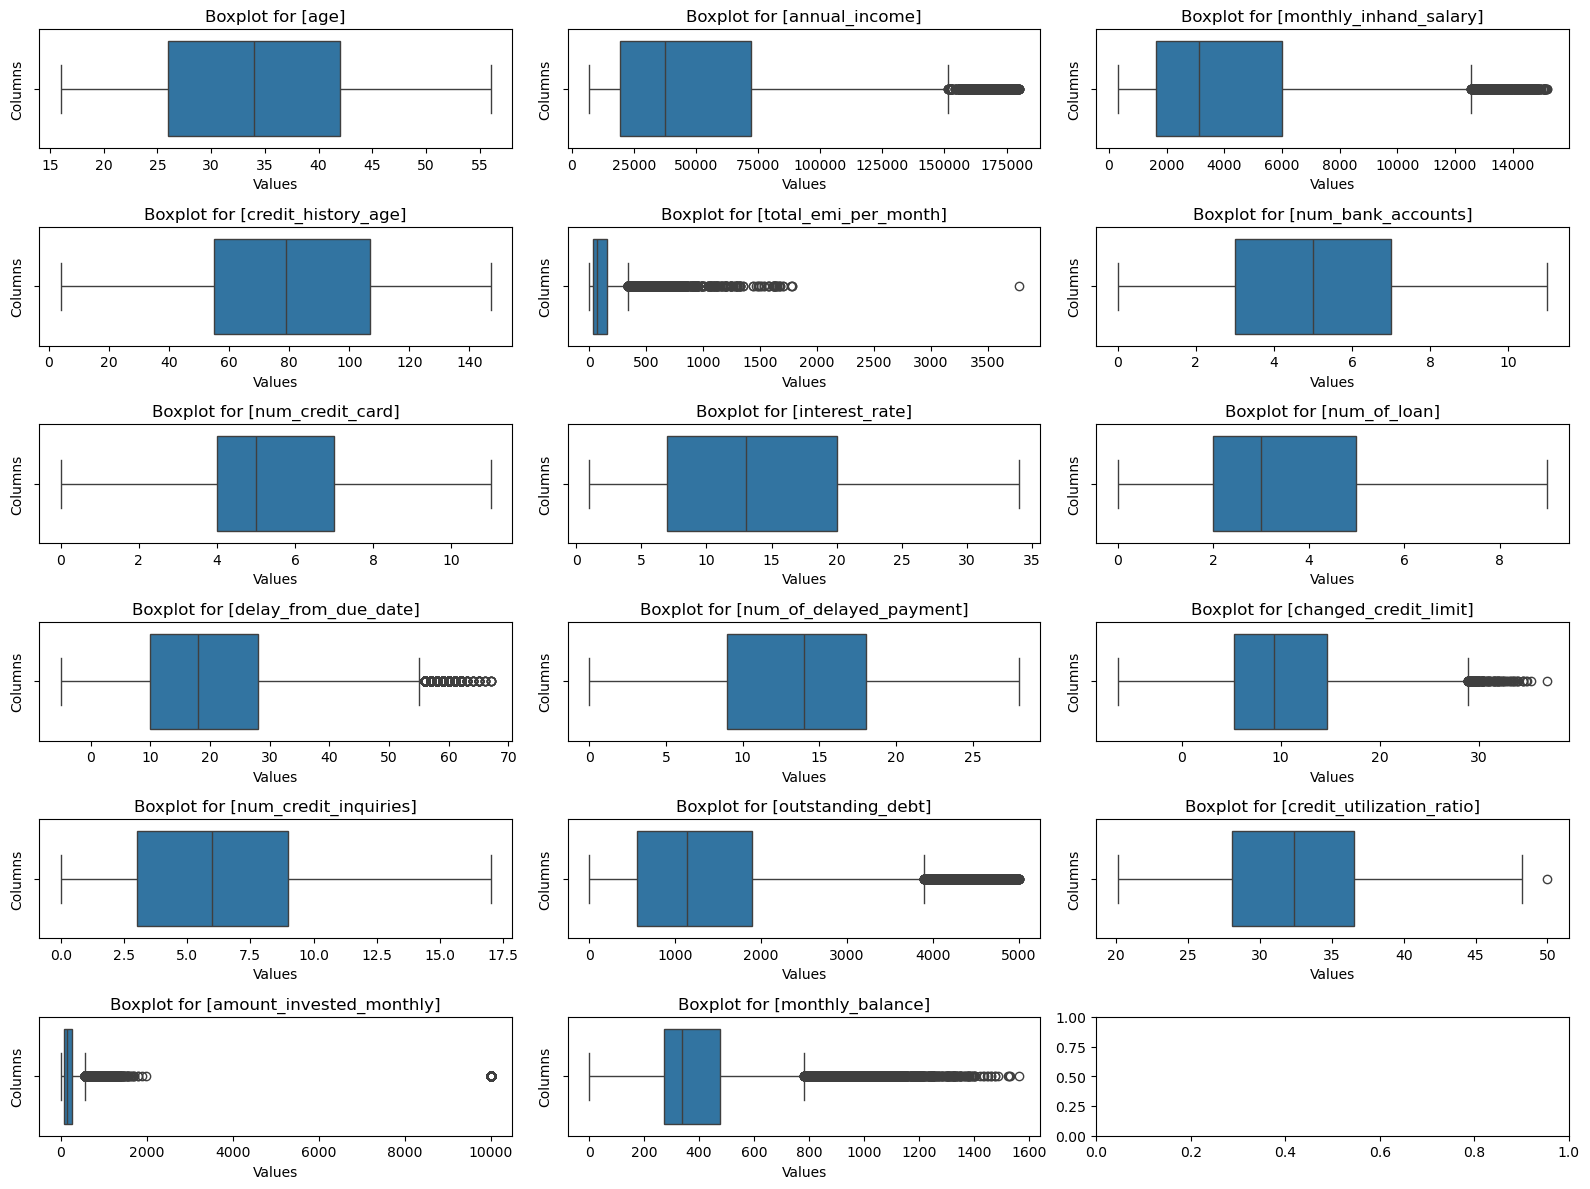

In [30]:
boxplot_skewness(df_clean, df_skewness, n_cols=3, row_height=2)

#### **Jumlah Outlier**

Berdasarkan statistik numerik dan visualisasi di atas, terlihat indikasi adanya outlier.

Kode berikut digunakan untuk menghitung outlier yang ada pada kolom numerik, berdasarkan jenis distribusinya.

> Pada kolom numerik di atas, kolom yang memiliki outlier di atas `5 %` hanya kolom `amount_invested_monthly`.
>
> Itu artinya pada tahap Feature Engineering, outlier ini harus ditangani sebelum dilakukan Modeling.

In [31]:
calculate_outlier_skew_based(df_clean, df_skewness)

,distribution,lower_boundary,upper_boundary,count,percentage
age,normal,-5.139498,73.139498,0,0.000000
annual_income,extreme,-138805.835000,230532.382500,0,0.000000
monthly_inhand_salary,extreme,-11464.519900,19095.963200,0,0.000000
credit_history_age,normal,-44.734517,206.734517,0,0.000000
total_emi_per_month,extreme,-341.842050,524.894870,498,2.060065
num_bank_accounts,normal,-4.796594,14.796594,0,0.000000
num_credit_card,normal,-2.179665,13.179665,0,0.000000
interest_rate,skewed,-12.500000,39.500000,0,0.000000
num_of_loan,normal,-5.305406,12.305406,0,0.000000
delay_from_due_date,skewed,-17.000000,55.000000,961,3.975345


#### **Histogram Kolom Numerik**

Berikut adalah visualisasi yang mirip dengan box plot, namun dalam bentuk histogram.

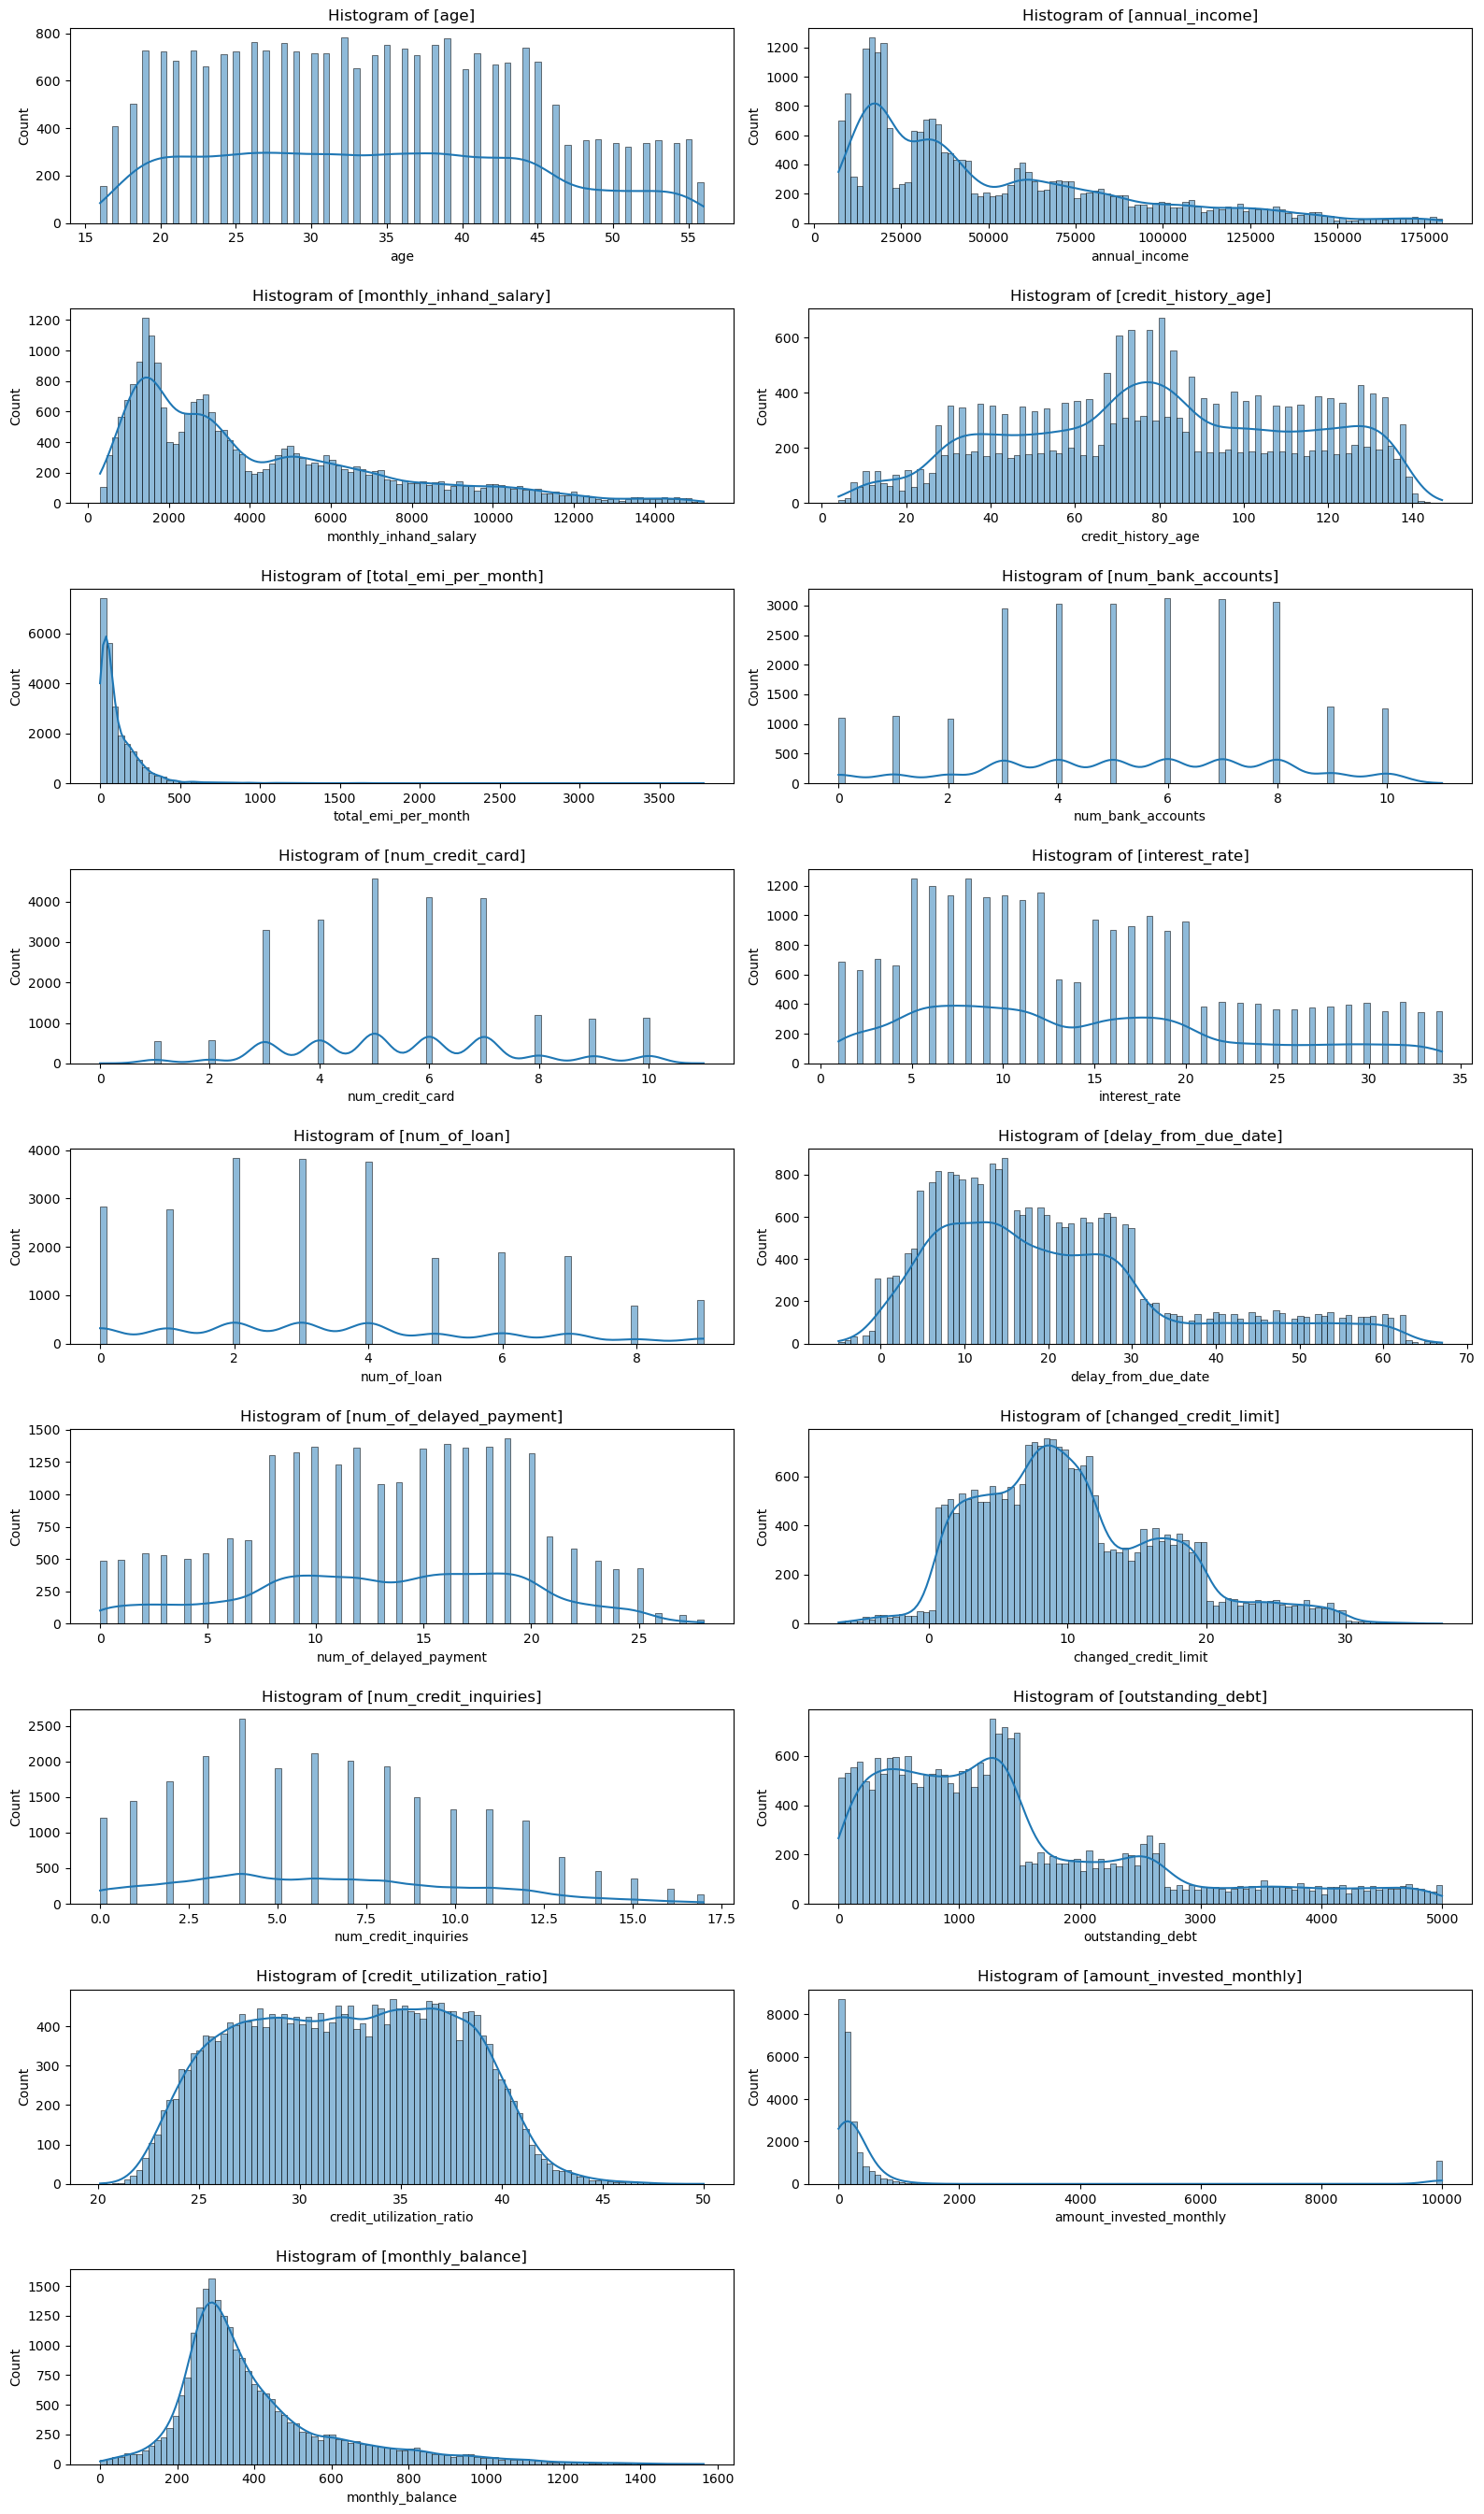

In [32]:
histogram_numeric_cols(df_clean, df_numeric_cols, n_cols=2, bins=100, row_height=3)

### **3. Eksplorasi Kolom Kategorikal**

#### **Visualisasi Nilai Unique Kolom Kategorikal**

Visualisasi kolom kategorikal berikut menggunakan **Bar Plot** dan **Pie Plot**.

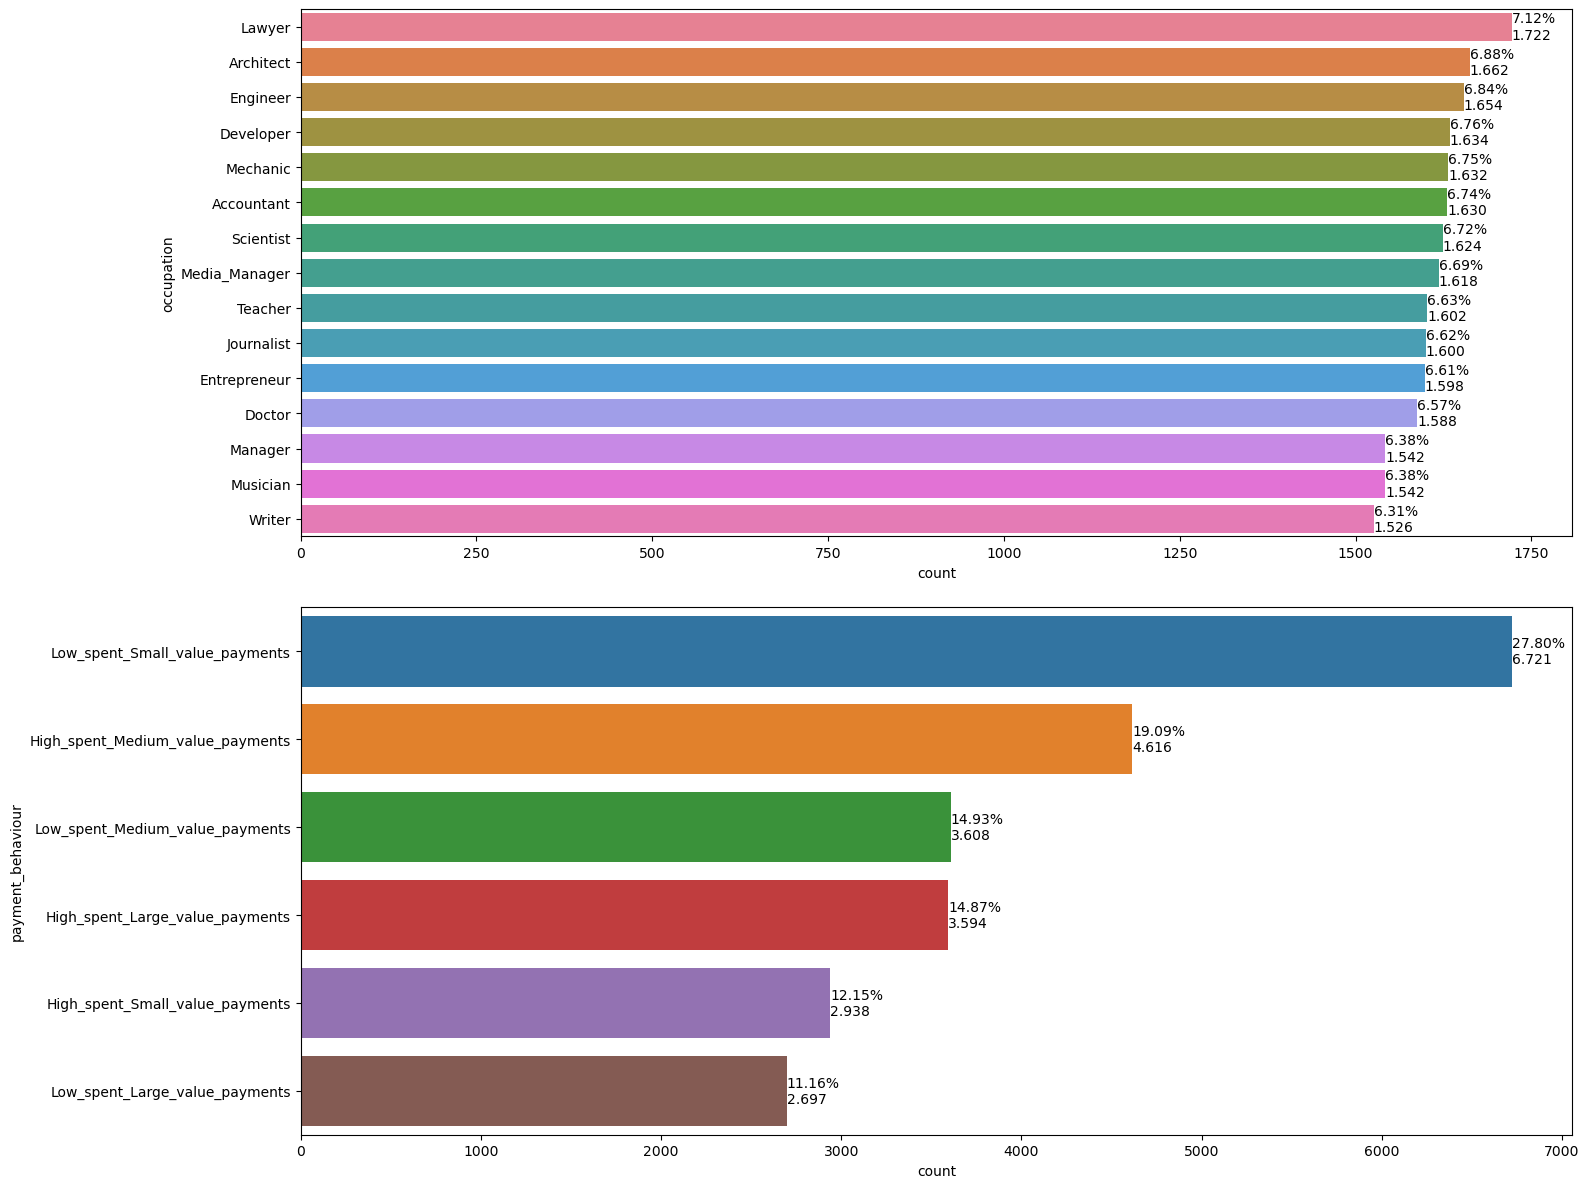

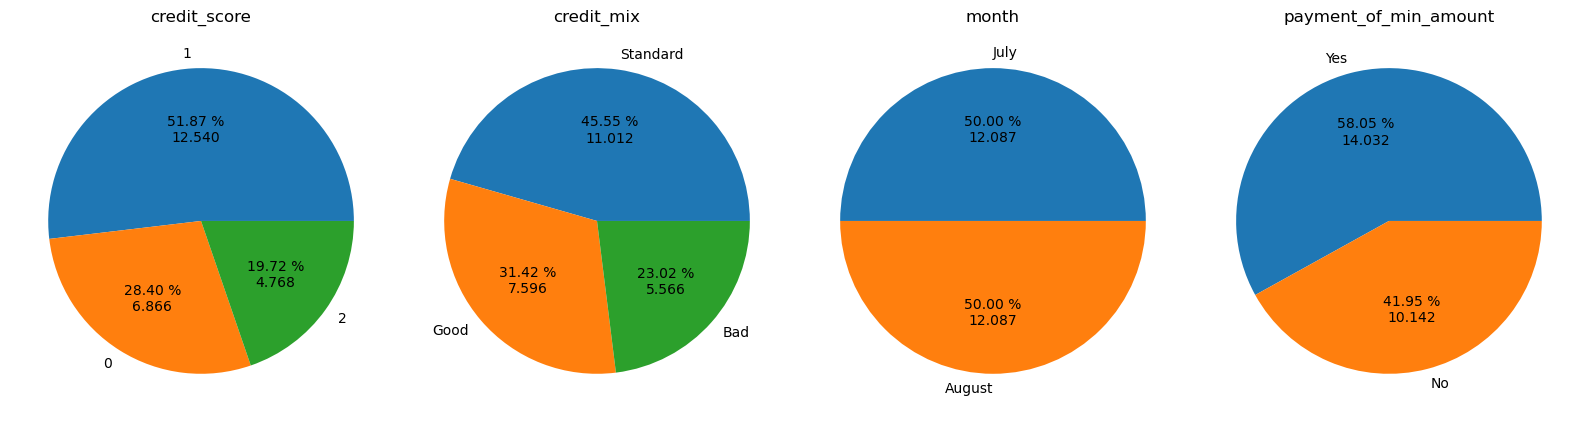

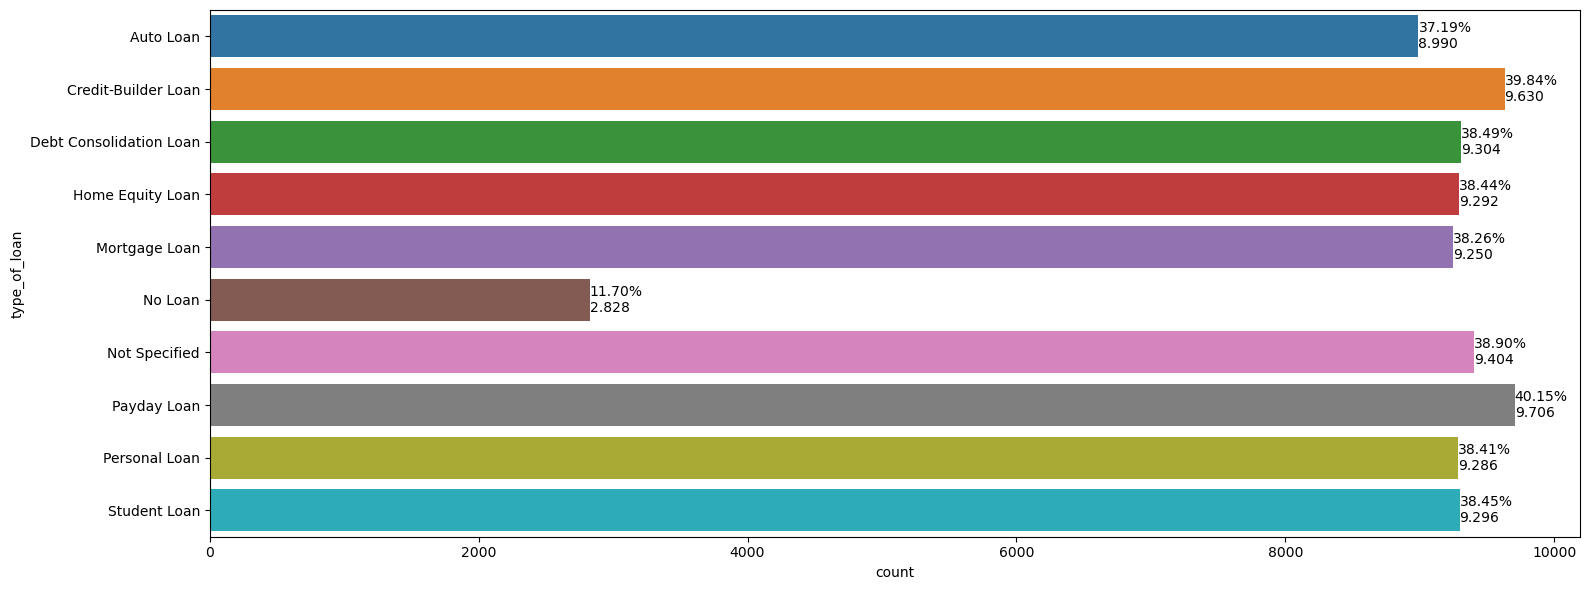

In [33]:
# Membuat Bar Plot pada kolom-kolom kategorikal dengan 4 < nunique <= 20
plotted_cols = df_clean[df_ordinal_cols + [x for x in df_nominal_cols if 'type_of_loan' not in x]].nunique()[df_clean.nunique().apply(lambda x: 4 < x <= 20)].sort_values(ascending=False).index.tolist()
plot_value_counts(df_clean, plotted_cols, row_height=6, n_cols=1)

# Membuat Bar Plot pada kolom-kolom kategorikal dengan 1 < nunique < 4
plotted_cols2 = df_clean[df_ordinal_cols + [x for x in df_nominal_cols if 'type_of_loan' not in x]].nunique()[df_clean.nunique().apply(lambda x: 1 < x < 4)].sort_values(ascending=False).index.tolist()
plot_value_counts(df_clean, plotted_cols2, row_height=6, n_cols=4)

plot_value_counts(df_clean, ['type_of_loan'], row_height=6, n_cols=1)

# **V. Feature Engineering**

## **A. Split Variabel Fitur dengan Variabel Target**

Variabel target untuk Dataset adalah kolom kategorikal ordinal _numeric-encoded_ `credit_score`.

In [34]:
y_cols_target  = 'credit_score'

X = df_clean.drop(y_cols_target, axis=1)
y = df_clean[y_cols_target]

X_cols_feature = X.columns.to_list()
pprint(X_cols_feature, compact=True)

['customer_id', 'month', 'name', 'age', 'ssn', 'occupation', 'annual_income',
 'monthly_inhand_salary', 'credit_history_age', 'total_emi_per_month',
 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
 'type_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
 'changed_credit_limit', 'num_credit_inquiries', 'credit_mix',
 'outstanding_debt', 'credit_utilization_ratio', 'payment_of_min_amount',
 'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
 'type_of_loan[Auto Loan]', 'type_of_loan[Credit-Builder Loan]',
 'type_of_loan[Debt Consolidation Loan]', 'type_of_loan[Home Equity Loan]',
 'type_of_loan[Mortgage Loan]', 'type_of_loan[No Loan]',
 'type_of_loan[Not Specified]', 'type_of_loan[Payday Loan]',
 'type_of_loan[Personal Loan]', 'type_of_loan[Student Loan]']


## **B. Pemisahan Jenis Kolom Fitur**

Jenis kolom sudah dipisahkan pada tahap EDA seperti tabel berikut:

| No. | Kolom                      | Jenis                                   |
| --: | -------------------------- | --------------------------------------- |
|   1 | `id`                       | Kategorikal Nominal                     |
|   2 | `customer_id`              | Kategorikal Nominal                     |
|   3 | `month`                    | Kategorikal Ordinal                     |
|   4 | `name`                     | Kategorikal Nominal                     |
|   5 | `age`                      | Numerik                                 |
|   6 | `ssn`                      | Kategorikal Nominal                     |
|   7 | `occupation`               | Kategorikal Nominal                     |
|   8 | `annual_income`            | Numerik                                 |
|   9 | `monthly_inhand_salary`    | Numerik                                 |
|  10 | `credit_history_age`       | Numerik                                 |
|  11 | `total_emi_per_month`      | Numerik                                 |
|  12 | `num_bank_accounts`        | Numerik                                 |
|  13 | `num_credit_card`          | Numerik                                 |
|  14 | `interest_rate`            | Numerik                                 |
|  15 | `num_of_loan`              | Numerik                                 |
|  16 | `delay_from_due_date`      | Numerik                                 |
|  17 | `num_of_delayed_payment`   | Numerik                                 |
|  18 | `changed_credit_limit`     | Numerik                                 |
|  19 | `num_credit_inquiries`     | Numerik                                 |
|  20 | `credit_mix`               | Kategorikal Nominal                     |
|  21 | `outstanding_debt`         | Numerik                                 |
|  22 | `credit_utilization_ratio` | Numerik                                 |
|  23 | `payment_of_min_amount`    | Kategorikal Nominal                     |
|  24 | `amount_invested_monthly`  | Numerik                                 |
|  25 | `payment_behaviour`        | Kategorikal Nominal                     |
|  26 | `monthly_balance`          | Numerik                                 |
|  27 | `credit_score`             | Kategorikal Ordinal - _numeric-encoded_ |
|  28 | `type_of_loan`             | Kategorikal Nominal - _one-hot encoded_ |

In [35]:
X_cols_ordinal = X.columns[X.columns.isin(df_ordinal_cols)].to_list()
X_cols_nominal = X.columns[X.columns.isin(df_nominal_cols)].to_list()
X_cols_numeric = X.columns[X.columns.isin(df_numeric_cols)].to_list()

## **C. Kardinalitas Fitur Kolom Kategorikal**

Berdasarkan eksplorasi data, kolom `type_of_loan` adalah kolom _multi-value_, sehingga nilai unique di dalamnya tidak terdeteksi dengan tepat.

Setelah dilakukan _One-Hot Encoding_ pada tahap data cleaning, terlihat bahwa nilai unique sebenarnya untuk kolom `type_of_loan` adalah `10`.

Dan setelah _One-Hot Encoding_, kolom `type_of_loan` masih tersisa pada data. Maka dari itu kolom `type_of_loan` akan dieliminasi pada tahap ini sebagai bagian dari cardinality check.

| Kolom                    | Kardinalitas | Kategori |
| ------------------------ | -----------: | :------: |
| `type_of_loan`           |       `5981` |   high   |
| `credit_mix`             |          `3` |   low    |
| `payment_of_min_amount`  |          `2` |   low    |
| `payment_behaviour`      |          `6` |   low    |
| `type_of_loan[...]` x 10 |          `2` |   low    |

In [36]:
high_cardinality = []
for col in X_cols_ordinal + X_cols_nominal:
    print(f'Kolom [{col}] nilai unique sebanyak ({X[col].nunique()})', end='')
    if X[col].nunique() <= 20:
        pass
    else:
        high_cardinality.append(col)
    print()

print('High Cardinality :', high_cardinality)

Kolom [month] nilai unique sebanyak (2)
Kolom [customer_id] nilai unique sebanyak (12087)
Kolom [name] nilai unique sebanyak (9859)
Kolom [ssn] nilai unique sebanyak (12087)
Kolom [occupation] nilai unique sebanyak (15)
Kolom [type_of_loan] nilai unique sebanyak (5981)
Kolom [credit_mix] nilai unique sebanyak (3)
Kolom [payment_of_min_amount] nilai unique sebanyak (2)
Kolom [payment_behaviour] nilai unique sebanyak (6)
Kolom [type_of_loan[Auto Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Credit-Builder Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Debt Consolidation Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Home Equity Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Mortgage Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[No Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Not Specified]] nilai unique sebanyak (2)
Kolom [type_of_loan[Payday Loan]] nilai unique sebanyak (2)
Kolom [type_of_loan[Personal Loan]] nilai unique sebanyak (2)
Kolom [type_

#### **Menghilangkan Variabel High Cardinality**

In [37]:
for col in high_cardinality:
    if col in X_cols_nominal:
        X_cols_nominal.remove(col)
    if col in X_cols_ordinal:
        X_cols_ordinal.remove(col)

## **D. Split Data Train dan Data Test**

Berdasarkan eksplorasi data, distribusi variabel target pada data tidak seimbang antara nilai unik `2` dengan `0` dan `1`.

Untuk itu split data dilakukan dengan tambahan parameter `stratified` sesuai variabel target, supaya sebaran data menjadi merata antara Data Train dengan Data Test.

Rasio _splitting_ adalah `20 %` Data Test.

In [38]:
# Splitting between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
X_train

Train Size:  (19339, 36)
Test Size:  (4835, 36)


,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,...,type_of_loan[Auto Loan],type_of_loan[Credit-Builder Loan],type_of_loan[Debt Consolidation Loan],type_of_loan[Home Equity Loan],type_of_loan[Mortgage Loan],type_of_loan[No Loan],type_of_loan[Not Specified],type_of_loan[Payday Loan],type_of_loan[Personal Loan],type_of_loan[Student Loan]
id,,,,,,,,,,,,,,,,,,,,,
0x24b7d,CUS_0x1883,August,David Millikenw,41,806-68-6819,Lawyer,61238.32,5006.1934,60,52.361890,...,0,0,0,0,1,0,0,0,0,1
0xf060,CUS_0xc56a,July,Qing Langig,28,625-55-2056,Developer,15985.29,1210.9858,63,101.979225,...,0,0,0,0,0,0,1,0,1,0
0x19d94,CUS_0x6987,July,Steve Gormane,33,132-81-3981,Lawyer,17640.42,1380.0350,15,80.612860,...,1,1,1,1,1,0,0,0,0,0
0x21805,CUS_0x4bef,August,McAllisterb,18,783-63-1238,Journalist,38505.32,2922.1475,46,214.658690,...,0,1,1,0,1,0,0,0,0,1
0xe5d5,CUS_0x9db8,August,Ablann,34,073-31-4015,Lawyer,90403.77,7433.6475,85,0.000000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x1ba9,CUS_0x2365,August,Browningo,43,552-90-7532,Writer,57610.32,4517.8600,8,256.234200,...,0,0,0,1,1,0,1,1,1,1
0x1a371,CUS_0x4953,August,Reddallr,23,181-95-5782,Mechanic,9807.79,1071.3158,67,65.117355,...,1,1,1,0,0,0,0,0,1,1
0x1efcd,CUS_0x1dd4,August,Johnson Richardi,49,692-38-9743,Doctor,140606.80,11876.2330,79,90.917530,...,0,0,0,0,0,0,0,1,0,0


## **E. Handling _Missing Values_**

Pada tahap eksplorasi data, tidak ditemukan missing values.

## **F. Handling Outlier**

Pada tahap eksplorasi data, saya mendapati adanya outlier pada kolom `amount_invested_monthly` di atas `5 %`. Untuk itu dilakukan pengecekan outlier lagi pada Data Train.

In [39]:
X_train_skewness = normal_skewness_df(X_train, X_cols_numeric)
X_outlier_stat = calculate_outlier_skew_based(X_train, X_train_skewness)
X_outlier_stat[X_outlier_stat['percentage'] >= 5]

,distribution,lower_boundary,upper_boundary,count,percentage
amount_invested_monthly,extreme,-498.78112,839.356625,1227,6.344692


Dari kode di atas, didapati bahwa persentase outlier pada fitur `amount_invested_monthly` jumlahnya di atas `5 %`.

> Untuk itu, pada Data Train kolom `amount_invested_monthly` akan dilakukan handling outlier dengan metode **Capping** karena persentasenya yang cukup banyak, di atas `5 %`.
> 
> Data Test tidak dilakukan handling outlier.

In [40]:
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=X_outlier_stat[X_outlier_stat['percentage'] >= 5].index.to_list(), missing_values='ignore')
winsoriser.fit(X_train)
X_train_outlier_capped = winsoriser.transform(X_train)

Setelah dilakukan capping maka hasilnya adalah persentase outlier menjadi nol seperti berikut.

In [41]:
X_train_outlier_capped_skewness = normal_skewness_df(X_train_outlier_capped, X_cols_numeric)
calculate_outlier_skew_based(X_train_outlier_capped, X_train_outlier_capped_skewness)

,distribution,lower_boundary,upper_boundary,count,percentage
age,normal,-5.153933,73.153933,0,0.000000
annual_income,extreme,-138462.290000,229879.460000,0,0.000000
monthly_inhand_salary,extreme,-11410.294000,19015.369100,0,0.000000
credit_history_age,normal,-45.930829,206.930829,0,0.000000
total_emi_per_month,extreme,-338.092050,519.886610,394,2.037334
num_bank_accounts,normal,-4.819195,14.819195,0,0.000000
num_credit_card,normal,-2.168601,13.168601,0,0.000000
interest_rate,skewed,-12.500000,39.500000,0,0.000000
num_of_loan,normal,-5.305097,12.305097,0,0.000000
delay_from_due_date,skewed,-17.000000,55.000000,778,4.022959


## **G. Feature Selection**

### **Uji Korelasi & Hypothesis Test**

Uji korelasi dilakukan antara kolom `credit_score` dengan kolom lainnya.

Karena kolom `credit_score` adalah kolom kategorikal, maka uji korelasi akan dilakukan dengan teknik **Kendall**.

In [42]:
tmp_corr_r = pd.DataFrame()
tmp_pval_p = pd.DataFrame()
tmp_hypothesis = pd.DataFrame()
X_y_concat = pd.concat([X, y], axis=1)
# Uji Korelasi Kendall dan Chi-Squared Test pada kolom kategorikal
for i, c1 in enumerate(X_cols_ordinal + X_cols_nominal):
    if type(X_y_concat[c1].iloc[0]) not in [tuple, list]:
        tmp_corr_r.loc[c1, y_cols_target], tmp_pval_p.loc[c1, y_cols_target] = stats.kendalltau(X_y_concat[c1], X_y_concat[y_cols_target])
        tmp_hypothesis.loc[c1, y_cols_target] = stats.chi2_contingency(pd.crosstab(X_y_concat[c1], X_y_concat[y_cols_target])).pvalue
        tmp_hypothesis.loc[c1, 'Reject'] = tmp_hypothesis.loc[c1, y_cols_target] < 0.05

# Uji Korelasi Kendall dan ANOVA Test pada kolom numerik
df_credit_score_groupby = X_y_concat[[y_cols_target] + X_cols_numeric].groupby(y_cols_target)
for i, c1 in enumerate(X_cols_numeric):
    tmp_corr_r.loc[c1, y_cols_target], tmp_pval_p.loc[c1, y_cols_target] = stats.kendalltau(X_y_concat[c1], X_y_concat[y_cols_target])
    tmp_hypothesis.loc[c1, y_cols_target] = stats.f_oneway(*[y[c1] for x, y in df_credit_score_groupby]).pvalue
    tmp_hypothesis.loc[c1, 'Reject'] = tmp_hypothesis.loc[c1, y_cols_target] < 0.05


#### **Hasil Uji Korelasi**

Kode berikut digunakan untuk menampilkan kolom-kolom yang nilai korelasinya di antara `-0.1` ke `0.1`. Kolom dengan nilai korelasi di antara rentang tersebut menunjukkan bahwa kolom tersebut tidak berkorelasi dengan `credit_score`.

In [43]:
display(tmp_corr_r[~((tmp_corr_r[y_cols_target] >= 0.1) | (tmp_corr_r[y_cols_target] <= -0.1))])

,credit_score
month,-0.000627
occupation,-0.007996
age,0.091774
total_emi_per_month,-0.033996
credit_utilization_ratio,0.024404
amount_invested_monthly,0.071332


Berdasarkan tabel di atas, kolom yang tidak berkorelasi dengan `credit_score` adalah:
  1. `month`
  1. `occupation`
  1. `age`
  2. `total_emi_per_month`
  3. `credit_utilization_ratio`
  3. `amount_invested_monthly`

Hasil di atas akan dijadikan pertimbangan dalam _feature selection_.

In [44]:
cols_uncorrelated = tmp_corr_r[~((tmp_corr_r[y_cols_target] >= 0.1) | (tmp_corr_r[y_cols_target] <= -0.1))].index.to_list()
print(f'Uncorrelated Cols [{len(cols_uncorrelated)}] : ', cols_uncorrelated)

Uncorrelated Cols [6] :  ['month', 'occupation', 'age', 'total_emi_per_month', 'credit_utilization_ratio', 'amount_invested_monthly']


#### **Hasil Uji Hipotesis**

Uji hipotesis dilakukan berdasarkan jenis kolom.

Untuk kolom kategorikal, uji hipotesis yang digunakan adalah **Chi-Squared Test** dengan iterasi formula uji hipotesis sebagai berikut:
  - `H0`: _Tidak ada hubungan antara `credit_score` dengan kolom terpilih_
  - `H1`: _Ada hubungan antara `credit_score` dengan kolom terpilih_

Untuk kolom numerik, uji hipotesis yang digunakan adalah **ANOVA Test** (karena jumlah nilai unique pada kolom `credit_score` adalah `3`) dengan iterasi formula uji hipotesis sebagai berikut:
  - `H0`: _Tidak ada perbedaan rata-rata yang signifikan pada kolom terpilih untuk setiap kelompok `credit_score`_
  - `H1`: _Ada setidaknya satu kelompok `credit_score` dengan perbedaan rata-rata yang signifikan pada kolom terpilih_

In [45]:
hypothesis_fail_reject = tmp_hypothesis[tmp_hypothesis['Reject'] == False].index.to_list()
hypothesis_reject = tmp_hypothesis[tmp_hypothesis['Reject'] == True].index.to_list()

display(tmp_hypothesis.loc[hypothesis_fail_reject])
print('Hypothesis failed to reject:', hypothesis_fail_reject)
print('Hypothesis rejected:', hypothesis_reject)

,credit_score,Reject
month,0.971543,False
amount_invested_monthly,0.271219,False


Hypothesis failed to reject: ['month', 'amount_invested_monthly']
Hypothesis rejected: ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'type_of_loan[Auto Loan]', 'type_of_loan[Credit-Builder Loan]', 'type_of_loan[Debt Consolidation Loan]', 'type_of_loan[Home Equity Loan]', 'type_of_loan[Mortgage Loan]', 'type_of_loan[No Loan]', 'type_of_loan[Not Specified]', 'type_of_loan[Payday Loan]', 'type_of_loan[Personal Loan]', 'type_of_loan[Student Loan]', 'age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age', 'total_emi_per_month', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'monthly_balance']


Berdasarkan tabel di atas, kolom dengan hasil p-value > critical value `0.05`, sehingga **`H0` _failed to reject_** dan **kolom tidak memiliki hubungan dengan `credit_score`** adalah: **Tidak Ada**. Uji hipotesis menghasilkan bahwa hampir semua kolom yang diuji memiliki hubungan dengan `credit_score`, yaitu:
  1. `occupation`
  2. `credit_mix`
  1. `payment_of_min_amount`
  1. `payment_behaviour`
  1. `type_of_loan[Auto Loan]`
  1. `type_of_loan[Credit-Builder Loan]`
  1. `type_of_loan[Debt Consolidation Loan]`
  1. `type_of_loan[Home Equity Loan]`
  1. `type_of_loan[Mortgage Loan]`
  1. `type_of_loan[No Loan]`
  1. `type_of_loan[Not Specified]`
  1. `type_of_loan[Payday Loan]`
  1. `type_of_loan[Personal Loan]`
  1. `type_of_loan[Student Loan]`
  1. `age`
  1. `annual_income`
  1. `monthly_inhand_salary`
  1. `credit_history_age`
  1. `total_emi_per_month`
  1. `num_bank_accounts`
  1. `num_credit_card`
  1. `interest_rate`
  1. `num_of_loan`
  1. `delay_from_due_date`
  1. `num_of_delayed_payment`
  1. `changed_credit_limit`
  1. `num_credit_inquiries`
  1. `outstanding_debt`
  1. `credit_utilization_ratio`
  1. `monthly_balance`

#### **Uji Korelasi vs Uji Hipotesis**

Berikut adalah kolom yang secara uji hipotesis _memiliki hubungan dengan `credit_score`_ namun memiliki nilai korelasi yang sangat rendah, yaitu:
  1. `occupation`
  1. `age`
  2. `total_emi_per_month`
  3. `credit_utilization_ratio`

In [46]:
corr_vs_hypo_whitelist = tmp_hypothesis[(tmp_hypothesis['Reject'] == True) & ~((tmp_corr_r[y_cols_target] >= 0.1) | (tmp_corr_r[y_cols_target] <= -0.1))].index.to_list()
display(tmp_hypothesis.loc[corr_vs_hypo_whitelist])

,credit_score,Reject
occupation,3.476863e-02,True
age,1.675160e-86,True
total_emi_per_month,1.072646e-59,True
credit_utilization_ratio,9.233568e-07,True


Karena secara uji hipotesis kolom-kolom tersebut masih memiliki hubungan dengan `credit_score`, maka kolom-kolom tersebut akan tetap masuk dalam proses _feature selection_.

In [47]:
cols_corr_hypo_blacklist = list(set(cols_uncorrelated + hypothesis_fail_reject) - set(corr_vs_hypo_whitelist))
print('Corr & Hypothesis Test Blacklist:', cols_corr_hypo_blacklist)

Corr & Hypothesis Test Blacklist: ['amount_invested_monthly', 'month']


### **Hasil Feature Selection**

In [48]:
X_cols_ordinal = X.columns[X.columns.isin(X_cols_ordinal) & ~X.columns.isin(cols_corr_hypo_blacklist)].to_list()
X_cols_nominal = X.columns[X.columns.isin(X_cols_nominal) & ~X.columns.isin(cols_corr_hypo_blacklist)].to_list()
X_cols_numeric = X.columns[X.columns.isin(X_cols_numeric) & ~X.columns.isin(cols_corr_hypo_blacklist)].to_list()

## **H. Feature Scaling**

Keseluruhan proses modeling akan dilakukan dengan menggunakan **Pipeline**. Untuk itu pada tahap ini hanya akan dilakukan definisi _scaler_ yang dipakai.

Jenis _Scaler_ yang akan digunakan adalah `RobustScaler`.

In [49]:
# X_scaler_numeric = RobustScaler()
X_scaler_numeric = MinMaxScaler()
# X_scaler_numeric = StandardScaler()

X_train_outlier_capped_skewness

,skewness,distribution,normal
column,,,
age,0.187824,normal,True
annual_income,1.128009,extreme,False
monthly_inhand_salary,1.126961,extreme,False
credit_history_age,-0.081412,normal,True
total_emi_per_month,4.588421,extreme,False
num_bank_accounts,-0.168759,normal,True
num_credit_card,0.222093,normal,True
interest_rate,0.525546,skewed,False
num_of_loan,0.473910,normal,True


## **I. Feature Encoding**

Keseluruhan proses modeling akan dilakukan dengan menggunakan **Pipeline**. Untuk itu pada tahap ini hanya akan dilakukan definisi _encoder_ yang dipakai.

Berikut adalah fitur kategorikal dan encoder yang akan dipakai:
| No. | Kolom                   | Jenis               | Kardinalitas |      Encoder      |
| --: | ----------------------- | ------------------- | -----------: | :---------------: |
|   1 | `occupation`            | Kategorikal Nominal |         `15` | `One-Hot Encoder` |
|   2 | `credit_mix`            | Kategorikal Nominal |          `3` | `One-Hot Encoder` |
|   3 | `payment_of_min_amount` | Kategorikal Nominal |          `2` | `One-Hot Encoder` |
|   4 | `payment_behaviour`     | Kategorikal Nominal |          `6` | `One-Hot Encoder` |

In [50]:
X_encoder_nominal = OneHotEncoder()

## **J. Pipeline Feature Transformation**

In [51]:
list_ohe_func = FunctionTransformer(
    lambda X: pd_col_list_to_encoded_type_of_loan(X)
)
list_ohe_pre_func = FunctionTransformer(
    lambda X: pd_col_list_to_encoded_pre(X, 'type_of_loan')
)

pipe_col_transformer = Pipeline([
    ('list_ohe_pre_trans', list_ohe_pre_func),
    ('list_ohe_trans', list_ohe_func),
    ('col_transformer', ColumnTransformer(
        transformers=[
            ('numeric', X_scaler_numeric, X_cols_numeric),
            ('nominal', X_encoder_nominal, X_cols_nominal),
        ]
    )),
])
pipe_col_transformer

Pipeline(steps=[('list_ohe_pre_trans',
                 FunctionTransformer(func=<function <lambda> at 0x000001A3E223FE20>)),
                ('list_ohe_trans',
                 FunctionTransformer(func=<function <lambda> at 0x000001A3E223F920>)),
                ('col_transformer',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'annual_income',
                                                   'monthly_inhand_salary',
                                                   'credit_history_age',
                                                   'total_emi_per_mo...
                                                   'payment_of_min_amount',
                                                   'payment_behaviour',
                                                   'type_of_loan[Auto Loan]',
                                                   'type_of_loan[Credit-Builder '
                                                   'Loan]',
                                                   'type_of_loan[Debt '
                                                   'Consolidation Loan]',
                                                   'type_of_loan[Home Equity '
                                                   'Loan]',
                                                   'type_of_loan[Mortgage '
                                                   'Loan]',
                                                   'type_of_loan[No Loan]',
                                                   'type_of_loan[Not '
                                                   'Specified]',
                                                   'type_of_loan[Payday Loan]',
                                                   'type_of_loan[Personal '
                                                   'Loan]',
                                                   'type_of_loan[Student '
                                                   'Loan]'])]))])

## **K. Dimensionality Reduction**

In [52]:
pipe_col_transformer_pca = pipe_col_transformer
pipe_col_transformer_pca.fit(X_train_outlier_capped)
X_train_transformed = pipe_col_transformer_pca.transform(X_train_outlier_capped)

pca = PCA(random_state=random_state)

pca.fit(X_train_transformed)

PCA(random_state=41)

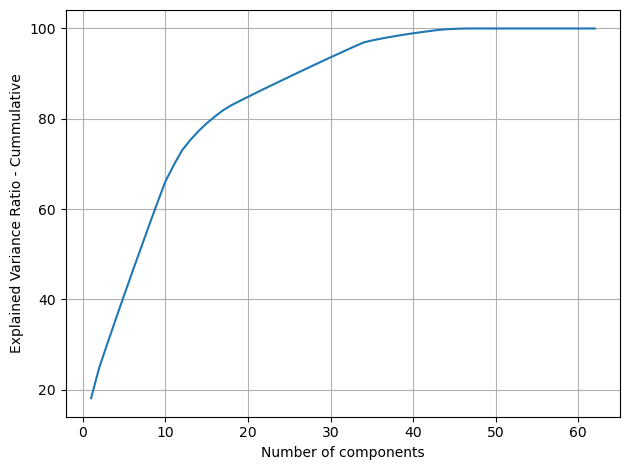

In [53]:
# fig, ax = plt.subplots(1,1,figsize=[12, 3.5])

plt.grid()
plt.plot(range(1, len(X_train_transformed[0])+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.tight_layout(w_pad=2)
plt.show()

In [54]:
# Check the number of features if we want to retain 95 % of the information
pca_retain_info = 0.95
pca_num_features = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= pca_retain_info) + 1

print('PCA Num Features:', pca_num_features)

PCA Num Features: 32


In [55]:
pca = PCA(n_components=pca_num_features, random_state=random_state)

display(pca)

PCA(n_components=32, random_state=41)

## **L. Pipeline Preprocessing**

Setelah metode _scaling_ dan _encoding_ ditentukan, selanjutnya adalah menyatukan kedua proses tersebut ke dalam _pipeline_ preprocessing `ColumnTransformer`.

Berikut adalah rangkuman preprocessing yang dilakukan:
| Proses   |     Objek      | Kolom          |
| -------- | :------------: | -------------- |
| scaling  | `MinMaxScaler` | `time_on_site` |
| encoding | _passthrough_  | `bounces`      |

In [56]:
pipe_preprocess = Pipeline([
    ('col_transformer', pipe_col_transformer),
    ('pca', pca),
])
pipe_preprocess.fit(X_train_outlier_capped)

Pipeline(steps=[('col_transformer',
                 Pipeline(steps=[('list_ohe_pre_trans',
                                  FunctionTransformer(func=<function <lambda> at 0x000001A3E223FE20>)),
                                 ('list_ohe_trans',
                                  FunctionTransformer(func=<function <lambda> at 0x000001A3E223F920>)),
                                 ('col_transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'annual_income',
                                                                    'monthly_inhand_salary',
                                                                    'cr...
                                                                    'Loan]',
                                                                    'type_of_loan[Credit-Builder '
                                                                    'Loan]',
                                                                    'type_of_loan[Debt '
                                                                    'Consolidation '
                                                                    'Loan]',
                                                                    'type_of_loan[Home '
                                                                    'Equity '
                                                                    'Loan]',
                                                                    'type_of_loan[Mortgage '
                                                                    'Loan]',
                                                                    'type_of_loan[No '
                                                                    'Loan]',
                                                                    'type_of_loan[Not '
                                                                    'Specified]',
                                                                    'type_of_loan[Payday '
                                                                    'Loan]',
                                                                    'type_of_loan[Personal '
                                                                    'Loan]',
                                                                    'type_of_loan[Student '
                                                                    'Loan]'])]))])),
                ('pca', PCA(n_components=32, random_state=41))])

## **M. Data Train Final**

Hasil feature engineering Data Training disimpan dalam variabel baru `X_train_final` dan `y_train_final`.

In [57]:
X_train_final = X_train_outlier_capped
y_train_final = y_train

X_train_final

,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,...,type_of_loan[Auto Loan],type_of_loan[Credit-Builder Loan],type_of_loan[Debt Consolidation Loan],type_of_loan[Home Equity Loan],type_of_loan[Mortgage Loan],type_of_loan[No Loan],type_of_loan[Not Specified],type_of_loan[Payday Loan],type_of_loan[Personal Loan],type_of_loan[Student Loan]
id,,,,,,,,,,,,,,,,,,,,,
0x24b7d,CUS_0x1883,August,David Millikenw,41,806-68-6819,Lawyer,61238.32,5006.1934,60,52.361890,...,0,0,0,0,1,0,0,0,0,1
0xf060,CUS_0xc56a,July,Qing Langig,28,625-55-2056,Developer,15985.29,1210.9858,63,101.979225,...,0,0,0,0,0,0,1,0,1,0
0x19d94,CUS_0x6987,July,Steve Gormane,33,132-81-3981,Lawyer,17640.42,1380.0350,15,80.612860,...,1,1,1,1,1,0,0,0,0,0
0x21805,CUS_0x4bef,August,McAllisterb,18,783-63-1238,Journalist,38505.32,2922.1475,46,214.658690,...,0,1,1,0,1,0,0,0,0,1
0xe5d5,CUS_0x9db8,August,Ablann,34,073-31-4015,Lawyer,90403.77,7433.6475,85,0.000000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x1ba9,CUS_0x2365,August,Browningo,43,552-90-7532,Writer,57610.32,4517.8600,8,256.234200,...,0,0,0,1,1,0,1,1,1,1
0x1a371,CUS_0x4953,August,Reddallr,23,181-95-5782,Mechanic,9807.79,1071.3158,67,65.117355,...,1,1,1,0,0,0,0,0,1,1
0x1efcd,CUS_0x1dd4,August,Johnson Richardi,49,692-38-9743,Doctor,140606.80,11876.2330,79,90.917530,...,0,0,0,0,0,0,0,1,0,0


# **VI. Model Definition**

Model yang akan digunakan untuk melakukan klasifikasi yaitu:
  1. **KNN**
  3. **SVM**
  3. **Decision Tree**
  4. **Random Forest**
  5. **Decision Tree with AdaBoost**

Model-model tersebut akan masih menggunakan hyperparameter default. Selanjutnya pada tahap Training akan dilakukan juga Hyperparameter Tuning.

Variabel target `credit_score` memiliki `3` nilai unique, yaitu:

| Nilai | Deskripsi             |
| :---: | --------------------- |
| `0`   | Bad Credit Score      |
| `1`   | Standard Credit Score |
| `2`   | Good Credit Score     |

Berdasarkan tabel di atas, maka menurut saya fokus utama evaluasi adalah mengurangi tingkat _False Negative_ dan _False Positive_ untuk variabel target `0` _Bad Credit Score_.
Menurut pendapat pribadi saya, hal paling utama yang diperhatikan oleh penyedia layanan peminjaman uang adalah menghindari peminjam dan calon peminjam yang memiliki _Bad Credit Score_, serta menerima pinjaman dari peminjam yang tidak _Bad Credit Score_. Dengan kata lain menghindari peminjam yang tidak mampu melakukan pembayaran tagihan pinjaman dan menerima peminjam yang mampu melakukan pembayaran tagihan.

Mengurangi _False Negative_ terhadap target `0` berarti mengurangi kasus peminjam yang dianggap mampu membayar tagihan pinjaman padahal ternyata tidak mampu membayar.
Dan mengurangi _False Positive_ terhadap target `0` berarti mengurangi kasus peminjam yang dianggap tidak mampu membayar tagihan pinjaman padahal ternyata mampu membayar.

> Dengan menggunakan _evaluation score_ **_f1 score_** terhadap target `0` _Bad Credit Score_, maka harapannya model yang dipilih adalah model yang bisa menghindari kasus-kasus tersebut.


Keseluruhan proses feature engineering dan modeling disatukan dalam bentuk _pipeline_, yang terurut berisi:
  1. _Pipeline_ feature engineering (_ColumnTransformer_) yang disimpan dalam variabel `model_pipes`
  2. Model yang akan di-training. Karena _Hyperparameter Tuning_ belum dilakukan, maka semua model yang digunakan pada training masih menggunakan parameter _default_.

Seluruh model yang didefinisikan akan disimpan dalam _collection_ berupa _dictionary_ dengan nama variabel `model_pipes`.

In [ ]:
# Evaluation Score = F1 Score terhadap 0
df_scoring = make_scorer(f1_score, average=None, labels=['0'], pos_label='0')

# Base Models
model_pipes = {
    'KNN': Pipeline([
        ('preprocess', pipe_preprocess),
        ('model', KNeighborsClassifier())
    ]),
    'SVM': Pipeline([
        ('preprocess', pipe_preprocess),
        ('model', SVC(random_state=random_state))
    ]),
    'DT': Pipeline([
        ('preprocess', pipe_preprocess),
        ('model', DecisionTreeClassifier(random_state=random_state))
    ]),
    'RF': Pipeline([
        ('preprocess', pipe_preprocess),
        ('model', RandomForestClassifier(random_state=random_state))
    ]),
    'DT_ADA': Pipeline([
        ('preprocess', pipe_preprocess),
        ('model', AdaBoostClassifier(
            # DecisionTreeClassifier(max_depth=3, random_state=random_state),
            DecisionTreeClassifier(random_state=random_state),
            random_state=random_state,
        ))
    ]),
}

model_pipes['DT_ADA']

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('col_transformer',
                                  Pipeline(steps=[('list_ohe_pre_trans',
                                                   FunctionTransformer(func=<function <lambda> at 0x000001A3E223FE20>)),
                                                  ('list_ohe_trans',
                                                   FunctionTransformer(func=<function <lambda> at 0x000001A3E223F920>)),
                                                  ('col_transformer',
                                                   ColumnTransformer(transformers=[('numeric',
                                                                                    MinMaxScaler(),
                                                                                    ['age',
                                                                                     'annual_incom...
                                                                                     'type_of_loan[Home '
                                                                                     'Equity '
                                                                                     'Loan]',
                                                                                     'type_of_loan[Mortgage '
                                                                                     'Loan]',
                                                                                     'type_of_loan[No '
                                                                                     'Loan]',
                                                                                     'type_of_loan[Not '
                                                                                     'Specified]',
                                                                                     'type_of_loan[Payday '
                                                                                     'Loan]',
                                                                                     'type_of_loan[Personal '
                                                                                     'Loan]',
                                                                                     'type_of_loan[Student '
                                                                                     'Loan]'])]))])),
                                 ('pca',
                                  PCA(n_components=32, random_state=41))])),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=41),
                                    random_state=41))])

# **VII. Model Training**

## **A. Base Model Training**

Training dilakukan untuk setiap model yang telah didefinisikan dengan perulangan pada _dictionary_.

In [59]:
# Model Training
for model_name, pipe in model_pipes.items():
    print(model_name, end='')
    tmp_start = time.time()
    pipe.fit(X_train_final, y_train_final)
    tmp_end = time.time()
    print(f' [{tmp_end - tmp_start} s]')

KNN [0.31500959396362305 s]
SVM [16.798540353775024 s]
DT [1.7162466049194336 s]
RF [12.749334335327148 s]
DT_ADA [1.7247977256774902 s]


## **B. Cross Validation**

Uji Cross-Validation dilakukan dengan _fold_ `5` dan _scoring_ **_f1 score_** terhadap target `0`.

In [60]:
def cv_models_best(models, X, y, skfold, scoring):
    '''
    Fungsi ini digunakan untuk mencari skor dan model terbaik berdasarkan uji cross-validation.
    '''
    result = pd.DataFrame()
    max_score = 0
    max_name = ''
    for name, pipe in models.items():
        print(name, end='')
        tmp_start = time.time()
        cv = cross_val_score(pipe, X, y, cv = skfold, scoring=scoring, n_jobs=-1, error_score="raise")
        tmp_end = time.time()
        print(f' [{tmp_end - tmp_start} s]')
        print(cv)
        print()
        result.loc[name, 'mean'] = cv.mean()
        result.loc[name, 'std'] = cv.std()
        result.loc[name, 'range_of_test_set_start'] = cv.mean()-cv.std()
        result.loc[name, 'range_of_test_set_end'] = cv.mean()+cv.std()
        result.loc[name, 'all'] = str(cv)
        if cv.mean() > max_score:
            max_score = cv.mean()
            max_name = name
    return max_name, result, max_score

In [61]:
# setting kfold
df_skfold = StratifiedKFold(n_splits = 5)

model_cv_best, cv_df, best_score_eval = cv_models_best(model_pipes, X_train_final, y_train_final, df_skfold, df_scoring)

KNN [3.4727487564086914 s]
[0.50845948 0.51015801 0.50965961 0.49484536 0.49623394]

SVM [28.513294458389282 s]
[0.56433184 0.53629032 0.53889748 0.52965661 0.52841476]

DT [3.559687852859497 s]
[0.52208835 0.51566697 0.49460432 0.50366972 0.50607834]

RF [12.247286081314087 s]
[0.63631914 0.60633037 0.58741259 0.58906172 0.59545674]

DT_ADA [2.1968941688537598 s]
[0.53255501 0.5139514  0.49446167 0.50824176 0.49886208]



### **Hasil Cross Validation**

Berdasarkan cross validation di atas, dari model-model yang sudah didefinisikan, model yang memiliki nilai rata-rata cross validation terbaik adalah **Random Forest** dengan rata-rata `0.602916`. Meski demikian, model lain masih memiliki nilai rata-rata cross validation yang mirip sehingga belum bisa disimpulkan bahwa model **Random Forest** adalah model terbaik.

In [62]:
print(f'Best CV: {model_cv_best} | {best_score_eval}')
cv_df.loc[model_cv_best, 'all']
display(cv_df)

Best CV: RF | 0.6029161100604601


,mean,std,range_of_test_set_start,range_of_test_set_end,all
KNN,0.503871,0.006839,0.497032,0.510711,[0.50845948 0.51015801 0.50965961 0.49484536 0...
SVM,0.539518,0.013016,0.526502,0.552534,[0.56433184 0.53629032 0.53889748 0.52965661 0...
DT,0.508422,0.009574,0.498848,0.517995,[0.52208835 0.51566697 0.49460432 0.50366972 0...
RF,0.602916,0.017974,0.584942,0.620890,[0.63631914 0.60633037 0.58741259 0.58906172 0...
DT_ADA,0.509614,0.013358,0.496256,0.522972,[0.53255501 0.5139514 0.49446167 0.50824176 0...


## **C. Evaluasi Base Model**

Berikut adalah proses evaluasi base model dengan hyperparameter default, yang belum diterapkan hyperparameter tuning.

In [63]:
# Prediksi pada Data Training
y_preds_train = {m: pipe.predict(X_train_final) for m, pipe in model_pipes.items()}

# Prediksi pada Data Test
y_preds_test = {m: pipe.predict(X_test) for m, pipe in model_pipes.items()}

In [ ]:
def my_scoring_df(y_train, y_preds_train, y_test, y_preds_test, scoring = f1_score):
    df_eval_precision = pd.DataFrame(index=y_preds_train.keys(), columns=['Train', 'Test', 'Selisih'])
    
    # Print Precision Score Data Training
    for model_name, y2_pred in y_preds_train.items():
        df_eval_precision.loc[model_name, 'Train'] = scoring(y_train, y2_pred)
    # Print Precision Score Data Test
    for model_name, y2_pred in y_preds_test.items():
        df_eval_precision.loc[model_name, 'Test'] = scoring(y_test, y2_pred)

    df_eval_precision['Selisih'] = df_eval_precision['Train'] - df_eval_precision['Test']

    return df_eval_precision

df_model_eval = my_scoring_df(y_train_final, y_preds_train, y_test, y_preds_test, scoring=lambda a, b: f1_score(a, b, average=None, labels=['0']))

df_model_eval

,Train,Test,Selisih
KNN,0.7008037568861194,0.5246252676659529,0.176178
SVM,0.6105944197331177,0.5460446247464503,0.06455
DT,1.0,0.5395656974604343,0.460434
RF,1.0,0.6273120818575364,0.372688
DT_ADA,1.0,0.533085501858736,0.466914


Dari tabel di atas, terlihat bahwa model **Decision Tree**, **Random Forest** **Decision Tree with AdaBoost** sangat _overfit_ terhadap data training, dengan nilai evaluasi sempurna `1`. Model **KNN** juga termasuk _overfit_ terhadap data training bila dibandingkan dengan data test, di mana selisih evaluation score adalah sekitar `17 %`. Model **SVM** termasuk _goodfit_ baik pada data training maupun data test, karena keduanya bernilai di atas `50 %` dengan selisih cukup kecil.

Maka dari itu dilakukan hyperparameter tuning untuk setiap model yang didefinisikan.

## **D. Hyperparameter Tuning**

Hyperparameter Tuning dilakukan pada setiap model yang didefinisikan dengan menggunakan teknik **Random Search CV**. Saya tidak menggunakan teknik **Grid Search** karena beban komputasinya yang besar.

Adapun hyperparameter untuk **Random Search CV** adalah sebagai berikut:
  1. Iterasi : `50` => setiap model di-training dengan `50` kombinasi hyperparameter yang berbeda
  2. Scoring : `f1_score` terhadap target `0`

Berikut adalah detail sebaran hyperparameter yang diuji untuk setiap model.

| Model                           | Hyperparameter      | Range         | Size | Total Size                 |
| ------------------------------- | ------------------- | ------------- | ---- | -------------------------- |
| **KNN**                         | `n_neighbors`       | `5 - 500`     | `50` | `50`                       |
| &nbsp;                          |                     |               |      |                            |
| **SVM**                         | `kernel`            | `3`           | `3`  | `3 x 2 x 8 x 8 x 5 = 1920` |
|                                 | `max_iter`          | `1000 - 2000` | `2`  |                            |
|                                 | `C`                 | `0.1 - 10`    | `8`  |                            |
|                                 | `gamma`             | `0.1 - 10`    | `8`  |                            |
|                                 | `degree`            | `1 - 5`       | `5`  |                            |
| &nbsp;                          |                     |               |      |                            |
| **Decision Tree**               | `max_depth`         | `10 - 1000`   | `10` | `10 x 5 x 5 = 250`         |
|                                 | `min_samples_leaf`  | `1 - 8`       | `5`  |                            |
|                                 | `min_samples_split` | `2 - 14`      | `5`  |                            |
| &nbsp;                          |                     |               |      |                            |
| **Random Forest**               | `max_depth`         | `1 - 50`      | `6`  | `6 x 5 x 5 = 150`          |
|                                 | `min_samples_leaf`  | `1 - 8`       | `5`  |                            |
|                                 | `min_samples_split` | `2 - 14`      | `5`  |                            |
| &nbsp;                          |                     |               |      |                            |
| **Decision Tree with AdaBoost** | `n_estimators`      | `50 - 200`    | `4`  | `4 x 13 = 52`              |
|                                 | `learning_rate`     | `0.1 - 10`    | `13` |                            |

In [65]:
# Base Models
randomcv_n_iter = 50
model_pipes_randomcv = {
    'KNN [HT-RSCV]': RandomizedSearchCV(estimator=model_pipes['KNN'],
                                param_distributions={
                                    'model__n_neighbors': [int(x) for x in np.linspace(start=5, stop=500, num = 50)],
                                },
                                n_iter=randomcv_n_iter,
                                cv=df_skfold,
                                random_state=random_state,
                                n_jobs=-1,
                                scoring=df_scoring),
    'SVM [HT-RSCV]': RandomizedSearchCV(estimator=model_pipes['SVM'],
                                param_distributions={
                                    'model__kernel': ['linear', 'poly', 'rbf'],
                                    'model__max_iter': [1000, 2000],
                                    'model__C': [0.1, 0.5] + [int(x) for x in np.linspace(start=1, stop=10, num = 6)],
                                    'model__gamma': [0.1, 0.5] + [int(x) for x in np.linspace(start=1, stop=10, num = 6)],
                                    'model__degree': [int(x) for x in np.linspace(start=1, stop=5, num = 5)],
                                },
                                n_iter=randomcv_n_iter,
                                cv=df_skfold,
                                random_state=random_state,
                                n_jobs=-1,
                                scoring=df_scoring),
    'DT [HT-RSCV]': RandomizedSearchCV(estimator=model_pipes['DT'],
                                param_distributions={
                                    'model__max_depth': [int(x) for x in np.linspace(10, 1000, 10)],
                                    'model__min_samples_leaf': [1, 2, 4, 6, 8],
                                    'model__min_samples_split': [2, 5, 10, 14],
                                },
                                n_iter=randomcv_n_iter,
                                cv=df_skfold,
                                random_state=random_state,
                                n_jobs=-1,
                                scoring=df_scoring),
    'RF [HT-RSCV]': RandomizedSearchCV(estimator=model_pipes['RF'],
                                param_distributions={
                                    'model__max_depth': [int(x) for x in np.linspace(1, 50, 6)],
                                    'model__min_samples_leaf': [1, 2, 4, 6, 8],
                                    'model__min_samples_split': [2, 5, 10, 14],
                                },
                                n_iter=randomcv_n_iter,
                                cv=df_skfold,
                                random_state=random_state,
                                n_jobs=-1,
                                scoring=df_scoring),
    'DT_ADA [HT-RSCV]': RandomizedSearchCV(estimator=model_pipes['DT_ADA'],
                                param_distributions={
                                    'model__n_estimators': [int(x) for x in np.linspace(50, 200, 4)],
                                    'model__learning_rate': [0.1, 0.5, 1] + [int(x) for x in np.linspace(1, 10, 10)],
                                },
                                n_iter=randomcv_n_iter,
                                cv=df_skfold,
                                random_state=random_state,
                                n_jobs=-1,
                                scoring=df_scoring),
}

model_pipes_randomcv['DT_ADA [HT-RSCV]']

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              Pipeline(steps=[('col_transformer',
                                                               Pipeline(steps=[('list_ohe_pre_trans',
                                                                                FunctionTransformer(func=<function <lambda> at 0x000001A3E223FE20>)),
                                                                               ('list_ohe_trans',
                                                                                FunctionTransformer(func=<function <lambda> at 0x000001A3E223F920>)),
                                                                               ('col...
                                                                   random_state=41))])),
                                             ('model',
                                              AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=41),
                                                                 random_state=41))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.1, 0.5, 1, 1,
                                                                 2, 3, 4, 5, 6,
                                                                 7, 8, 9, 10],
                                        'model__n_estimators': [50, 100, 150,
                                                                200]},
                   random_state=41,
                   scoring=make_scorer(f1_score, response_method='predict', average=None, labels=['0'], pos_label=0))

## **E. Tuned Model Training**

In [66]:
# Model Training
for model_name, pipe in model_pipes_randomcv.items():
    print(model_name, end='')
    tmp_start = time.time()
    pipe.fit(X_train_final, y_train_final)
    tmp_end = time.time()
    print(f' [{tmp_end - tmp_start} s]')

KNN [HT-RSCV] [46.00062799453735 s]
SVM [HT-RSCV]

d:\Apps\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 [367.0853133201599 s]
DT [HT-RSCV] [40.479968309402466 s]
RF [HT-RSCV] [222.12477898597717 s]
DT_ADA [HT-RSCV] [45.98410701751709 s]


## **F. Hyperparameter Tuning Best Parameter & Model**

Kode berikut digunakan untuk melihat best parameter dan mengambil setiap model dengan best parameter masing-masing.

In [67]:
model_pipes_randomcv_best = {}
for model_name, pipe in model_pipes_randomcv.items():
    print(f'[{model_name}] Best Params: {pipe.best_params_}')
    model_pipes_randomcv_best[model_name] = pipe.best_estimator_

[KNN [HT-RSCV]] Best Params: {'model__n_neighbors': 5}
[SVM [HT-RSCV]] Best Params: {'model__max_iter': 2000, 'model__kernel': 'rbf', 'model__gamma': 0.5, 'model__degree': 4, 'model__C': 4}
[DT [HT-RSCV]] Best Params: {'model__min_samples_split': 14, 'model__min_samples_leaf': 4, 'model__max_depth': 10}
[RF [HT-RSCV]] Best Params: {'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
[DT_ADA [HT-RSCV]] Best Params: {'model__n_estimators': 50, 'model__learning_rate': 10}


# **VIII. Model Evaluation**

## **A. Evaluasi Tuned Model - _f1 score_ terhadap target `0`**

In [82]:
# Prediksi pada Data Training
y_preds_train_ht = {m: pipe.best_estimator_.predict(X_train_final) for m, pipe in model_pipes_randomcv.items()}

# Prediksi pada Data Test
y_preds_test_ht = {m: pipe.best_estimator_.predict(X_test) for m, pipe in model_pipes_randomcv.items()}

In [96]:
df_model_eval_ht = my_scoring_df(y_train_final, y_preds_train_ht, y_test, y_preds_test_ht, scoring=lambda a, b: f1_score(a, b, average=None, labels=['0']))

df_model_eval_ht

,Train,Test,Selisih
KNN [HT-RSCV],0.7008037568861194,0.5246252676659529,0.176178
SVM [HT-RSCV],0.6915011914217633,0.5212271459559963,0.170274
DT [HT-RSCV],0.6300157356412274,0.5113547376664056,0.118661
RF [HT-RSCV],0.9925762991476491,0.6268187180495478,0.365758
DT_ADA [HT-RSCV],1.0,0.533085501858736,0.466914


Tabel di atas adalah _evaluation score_ dengan menggunakan **_f1 score_** terhadap target `0`.

Model **KNN** setelah hyperparameter tuning menghasilkan evaluation score yang miring antara data training dan data test dengan selisih sekitar `17 %`. Hanya saja evaluation score yang dihasilkan masih termasuk _underfit_ karena nilainya yang hanya berkisar `52 %`.

Model **SVM** setelah hyperparameter tuning menghasilkan evaluation score yang miring antara data training dan data test dengan selisih sekitar `17 %`. Hanya saja evaluation score yang dihasilkan masih termasuk _underfit_ karena nilainya yang hanya berkisar `52 %`.

Model **Decision Tree** setelah hyperparameter tuning masih menghasilkan yang miring antara data training dan data test dengan selisih sekitar `11 %`. Hanya saja evaluation score yang dihasilkan masih termasuk _underfit_ karena nilainya yang hanya berkisar `51 %`.

Model **Random Forest** setelah hyperparameter tuning masih menghasilkan evaluation score yang sangat _overfit_ terhadap data training. Evaluation score untuk data test masih terbilang sedikit baik karena nilainya berkisar `62 %`.

Model **Decision Tree with AdaBoost** setelah hyperparameter tuning menghasilkan evaluation score yang sangat _overfit_ terhadap data training. Evaluation score untuk data test masih terbilang kurang karena nilainya berkisar `53 %`.

Sedangkan tabel di bawah ini adalah perbandingan antara sebelum dan sesudah hyperparameter tuning.

In [97]:
df_model_eval_comp = pd.DataFrame()
for i, idx in enumerate(df_model_eval.index):
    df_model_eval_comp.loc[f'{idx} |vs| HT', 'Train'] = df_model_eval.iloc[i].loc['Train'] - df_model_eval_ht.iloc[i].loc['Train']
    df_model_eval_comp.loc[f'{idx} |vs| HT', 'Test'] = df_model_eval.iloc[i].loc['Test'] - df_model_eval_ht.iloc[i].loc['Test']

display(df_model_eval_comp)

,Train,Test
KNN |vs| HT,0.000000,0.000000
SVM |vs| HT,-0.080907,0.024817
DT |vs| HT,0.369984,0.028211
RF |vs| HT,0.007424,0.000493
DT_ADA |vs| HT,0.000000,0.000000


Pada tabel di atas, selisih yang bernilai negatif artinya terjadi peningkatan evaluation score dari sebelum ke sesudah hyperparameter tuning.

Terlihat bahwa model **SVM** yang mengalami peningkatan setelah dilakukan hyperparameter tuning dengan peningkatan sekitar `8 %` pada data training dan, namun mengalami penurunan `2 %` pada data test. Model lain tidak menunjukkan peningkatan dan malah menunjukkan sedikit penurunan.

In [85]:
df_model_eval_ht_concat = pd.concat([df_model_eval, df_model_eval_ht])
display(pd.DataFrame(df_model_eval_ht_concat.sort_values('Test', ascending=False)))

,Train,Test,Selisih
RF,1.0,0.6273120818575364,0.372688
RF [HT-RSCV],0.9925762991476491,0.6268187180495478,0.365758
SVM,0.6105944197331177,0.5460446247464503,0.06455
DT,1.0,0.5395656974604343,0.460434
DT_ADA,1.0,0.533085501858736,0.466914
DT_ADA [HT-RSCV],1.0,0.533085501858736,0.466914
KNN,0.7008037568861194,0.5246252676659529,0.176178
KNN [HT-RSCV],0.7008037568861194,0.5246252676659529,0.176178
SVM [HT-RSCV],0.6915011914217633,0.5212271459559963,0.170274
DT [HT-RSCV],0.6300157356412274,0.5113547376664056,0.118661


Dari kode di atas, terlihat bahwa model yang paling baik dalam memprediksi data test adalah model **Random Forest _sebelum_ Hyperparameter Tuning**. Akan tetapi, model tersebut sangat _overfit_ karena nilai evaluation score pada data train yang sama dengan `1`.

> Maka model yang dianggap model terbaik adalah model **Random Forest _sebelum_ Hyperparameter Tuning** karena meskipun model tersebut adalah _overfit_, namun selisihnya dengan model lain yaitu **SVM _sebelum_ Hyperparameter Tuning** cukup tinggi (dari `62 %` ke `54 %`).

Kode berikut menunjukkan model yang tidak _overfit_, yaitu model yang selisih evaluation score antara data training dengan data test kurang dari `10 %` atau `0.l`.

> Terlihat bahwa baris teratas **SVM _sebelum_ Hyperparameter Tuning** adalah **model _goodfit_** yang dihasilkan dari rangkaian proses Model Training.
>
> Namun model ini menghasilkan evaluation score yang cukup rendah pada data test, yaitu sekitar `54 %`. Maka dari itu model ini tidak dijadikan sebagai model terbaik meskipun masuk dalam kategori _good fit_.

In [86]:
display(pd.DataFrame(df_model_eval_ht_concat[df_model_eval_ht_concat['Selisih'].apply(abs) < 0.1].sort_values('Test', ascending=False)))

,Train,Test,Selisih
SVM,0.6105944197331177,0.5460446247464503,0.06455


## **B. Confusion Matrix**

In [87]:
def confusion_matrix_plots(y_train, y_preds_train, y_test, y_preds_test, figure_width = 16, row_height = 4):
    '''
    Fungsi ini digunakan untuk menampilkan confusion matrix setiap model pada data training dan data test.
    '''
    tmp_plot_cols = 2
    tmp_plot_rows = len(y_preds_train)
    tmp_fig = plt.figure(figsize = (figure_width,row_height*tmp_plot_rows))
    i = 0
    for m in y_preds_train:
        y_pred_train = y_preds_train[m]
        tmp_ax = plt.subplot(tmp_plot_rows,tmp_plot_cols,i+1)
        tmp_cm_train = confusion_matrix(y_train, y_pred_train)
        ConfusionMatrixDisplay(tmp_cm_train).plot(ax=tmp_ax)
        plt.title(f'Train - {m}')
        i += 1
        
        y_pred_test = y_preds_test[m]
        tmp_ax = plt.subplot(tmp_plot_rows,tmp_plot_cols,i+1)
        tmp_cm_test = confusion_matrix(y_test, y_pred_test)
        ConfusionMatrixDisplay(tmp_cm_test).plot(ax=tmp_ax)
        plt.title(f'Test - {m}')
        i += 1
    plt.tight_layout(h_pad=5,w_pad=0)
    plt.show()

### **1. Confusion Matrix Sebelum Hyperparameter Tuning**

Confusion matrix kiri adalah terhadap data training, sedangkan yang kanan adalah terhadap data test.

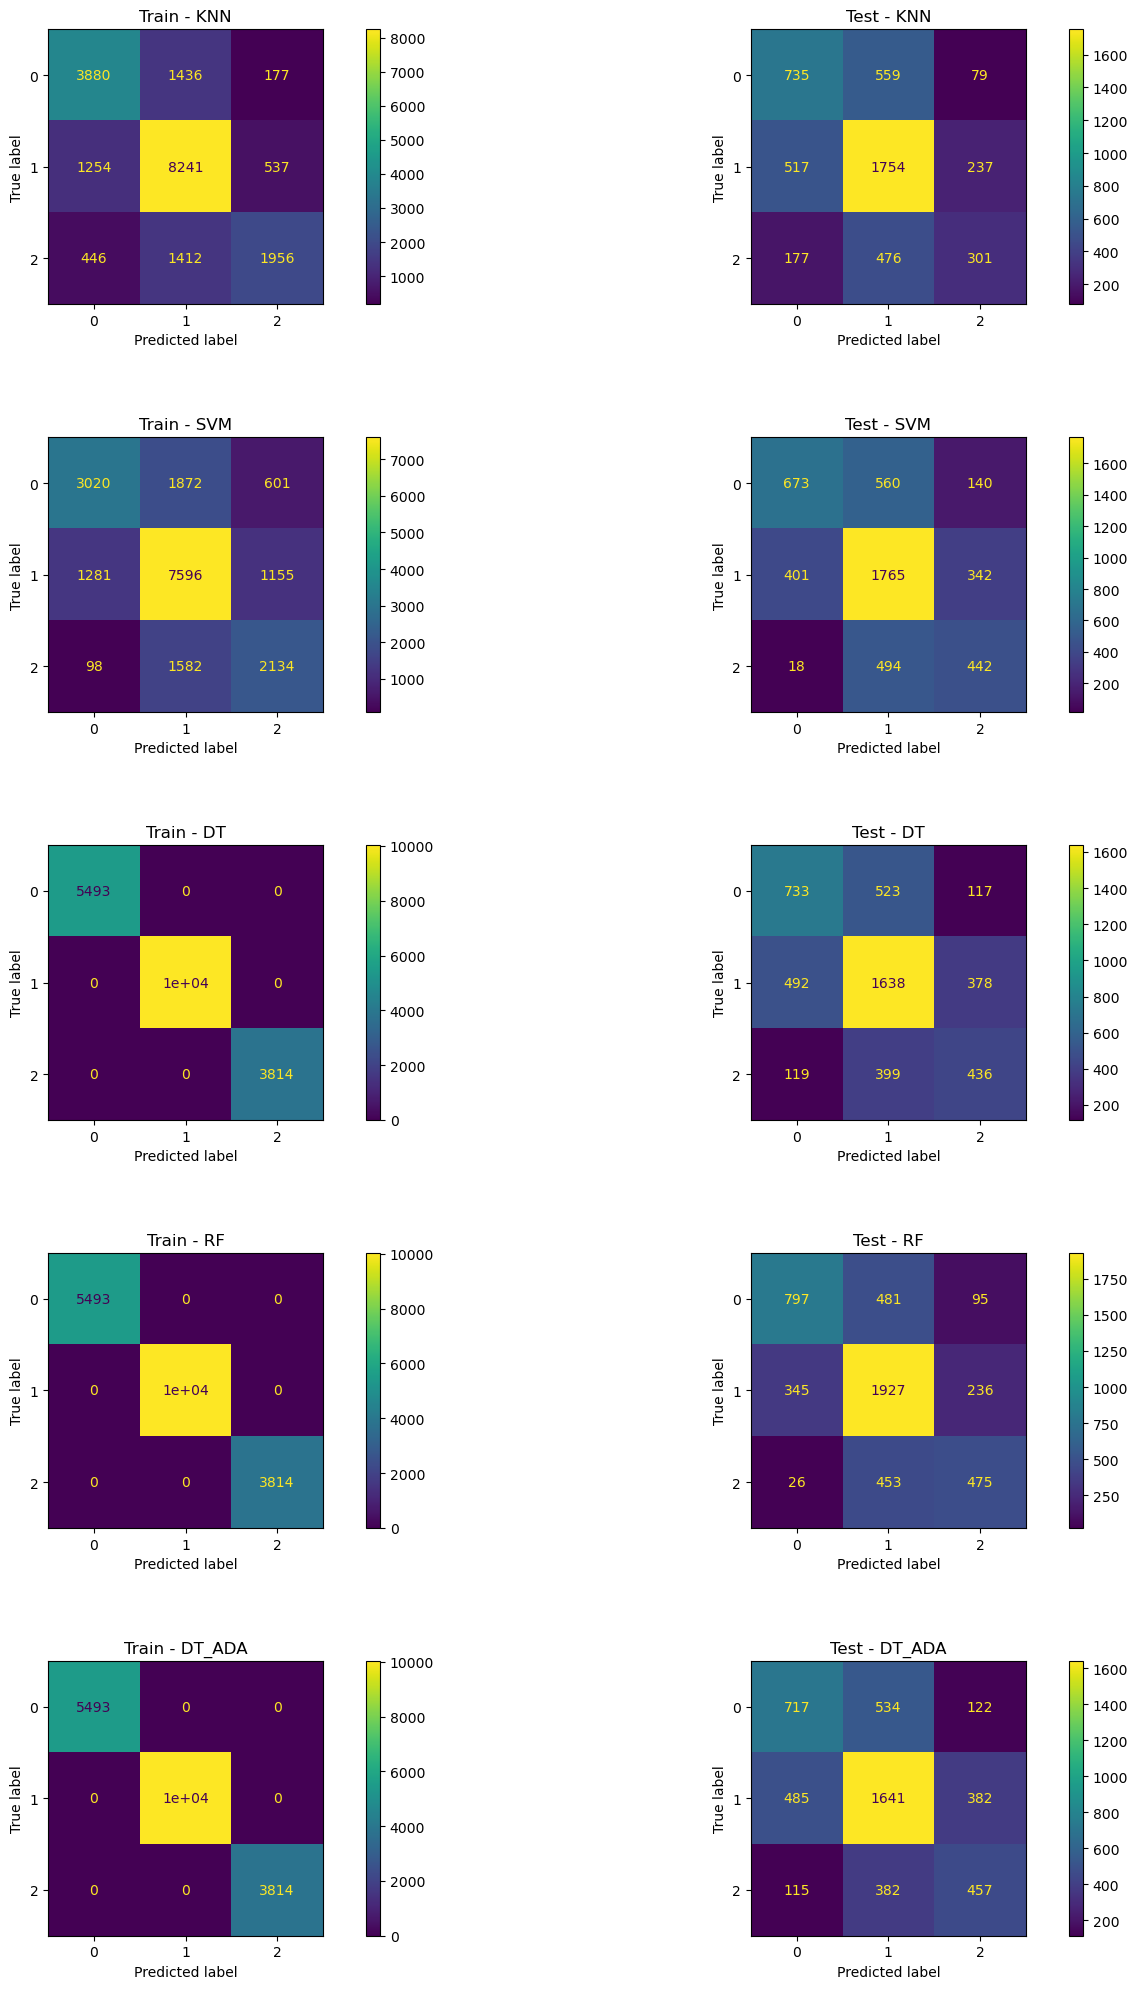

In [88]:
# Confusion Matrix Sebelum Hyperparameter Tuning
confusion_matrix_plots(y_train_final, y_preds_train, y_test, y_preds_test)

### **2. Confusion Matrix Setelah Hyperparameter Tuning**

Confusion matrix kiri adalah terhadap data training, sedangkan yang kanan adalah terhadap data test.

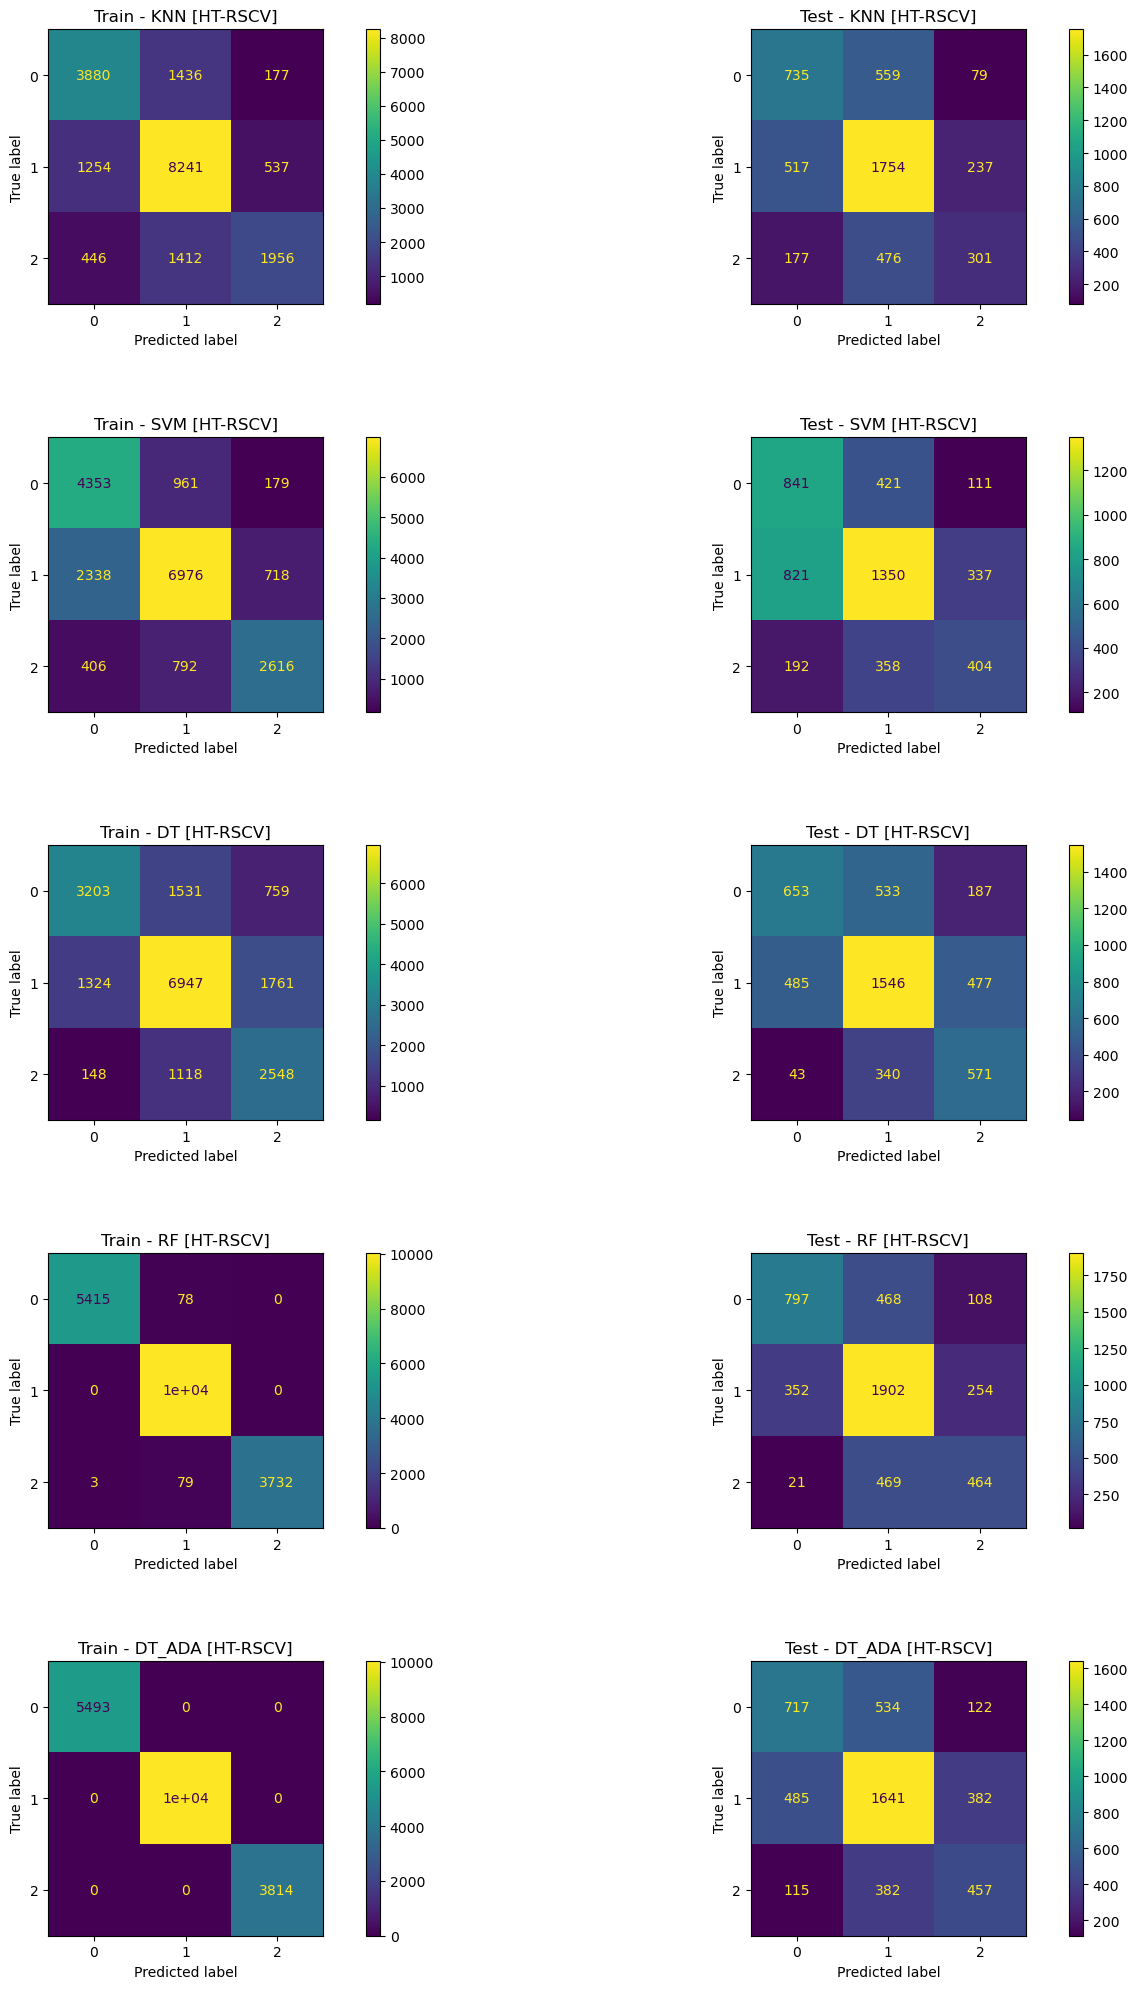

In [89]:
confusion_matrix_plots(y_train_final, y_preds_train_ht, y_test, y_preds_test_ht)

## **C. Classification Report**

### **1. Classification Report Sebelum Hyperparameter Tuning**

#### **a. Classification Report Data Training**

In [90]:
for model_name, y_pred in y_preds_train.items():
    print(model_name)
    print(classification_report(y_train_final, y_pred))
    print('-'*50)

KNN
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      5493
           1       0.74      0.82      0.78     10032
           2       0.73      0.51      0.60      3814

    accuracy                           0.73     19339
   macro avg       0.72      0.68      0.69     19339
weighted avg       0.73      0.73      0.72     19339

--------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.69      0.55      0.61      5493
           1       0.69      0.76      0.72     10032
           2       0.55      0.56      0.55      3814

    accuracy                           0.66     19339
   macro avg       0.64      0.62      0.63     19339
weighted avg       0.66      0.66      0.66     19339

--------------------------------------------------
DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5493
           1    

#### **b. Classification Report Data Test**

In [91]:
for model_name, y_pred in y_preds_test.items():
    print(model_name)
    print(classification_report(y_test, y_pred))
    print('-'*50)

KNN
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1373
           1       0.63      0.70      0.66      2508
           2       0.49      0.32      0.38       954

    accuracy                           0.58      4835
   macro avg       0.54      0.52      0.52      4835
weighted avg       0.57      0.58      0.57      4835

--------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      1373
           1       0.63      0.70      0.66      2508
           2       0.48      0.46      0.47       954

    accuracy                           0.60      4835
   macro avg       0.57      0.55      0.56      4835
weighted avg       0.59      0.60      0.59      4835

--------------------------------------------------
DT
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1373
           1    

### **2. Classification Report Setelah Hyperparameter Tuning**

#### **a. Classification Report Data Training**

In [92]:
for model_name, y_pred in y_preds_train_ht.items():
    print(model_name)
    print(classification_report(y_train_final, y_pred))
    print('-'*50)

KNN [HT-RSCV]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      5493
           1       0.74      0.82      0.78     10032
           2       0.73      0.51      0.60      3814

    accuracy                           0.73     19339
   macro avg       0.72      0.68      0.69     19339
weighted avg       0.73      0.73      0.72     19339

--------------------------------------------------
SVM [HT-RSCV]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69      5493
           1       0.80      0.70      0.74     10032
           2       0.74      0.69      0.71      3814

    accuracy                           0.72     19339
   macro avg       0.72      0.72      0.72     19339
weighted avg       0.74      0.72      0.72     19339

--------------------------------------------------
DT [HT-RSCV]
              precision    recall  f1-score   support

           0       0.69      0.58      0

#### **b. Classification Report Data Test**

In [93]:
for model_name, y_pred in y_preds_test_ht.items():
    print(model_name)
    print(classification_report(y_test, y_pred))
    print('-'*50)

KNN [HT-RSCV]
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1373
           1       0.63      0.70      0.66      2508
           2       0.49      0.32      0.38       954

    accuracy                           0.58      4835
   macro avg       0.54      0.52      0.52      4835
weighted avg       0.57      0.58      0.57      4835

--------------------------------------------------
SVM [HT-RSCV]
              precision    recall  f1-score   support

           0       0.45      0.61      0.52      1373
           1       0.63      0.54      0.58      2508
           2       0.47      0.42      0.45       954

    accuracy                           0.54      4835
   macro avg       0.52      0.52      0.52      4835
weighted avg       0.55      0.54      0.54      4835

--------------------------------------------------
DT [HT-RSCV]
              precision    recall  f1-score   support

           0       0.55      0.48      0

## **D. Kesimpulan Model Evaluation**

Dari hasil evaluasi keempat model sebelum dan setelah hyperparameter tuning, berikut adalah kesimpulan yang saya ambil:
  1. Model terbaik yang dihasilkan adalah model **Random Forest _sebelum_ Hyperparameter Tuning** (`RF`) dengan _evaluation score_ **_f1 score_** terhadap target `0` sekitar `62.7 %`.
  2. Menurut saya model yang tersebut adalah model yang sudah cukup baik sebagai model prediksi `credit_score`. Meskipun performanya tidak terlalu tinggi (masih di bawah `70 %`), namun jika dibandingkan dengan model lain didapatkan bahwa model **Random Forest _sebelum_ Hyperparameter Tuning** memiliki performa tertinggi pada data test.

In [99]:
best_model_name = df_model_eval_ht_concat['Test'].idxmax()
if best_model_name in model_pipes_randomcv_best:
    best_model = model_pipes_randomcv_best[best_model_name]
else:
    best_model = model_pipes[best_model_name]

print('Best Model:', best_model_name)
print('Evaluation Score:', df_model_eval_ht_concat.loc[best_model_name, 'Test'])
if best_model_name in model_pipes_randomcv_best:
    print('Best Model Params:', model_pipes_randomcv[best_model_name].best_params_)

Best Model: RF
Evaluation Score: 0.6273120818575364


# **IX. Model Saving**

| File                                                       | Format   | Deskripsi                                                 |
| ---------------------------------------------------------- | -------- | --------------------------------------------------------- |
| [`models_best.pkl`](./models_best.pkl)                       | `dill (pickle)` | Model terbaik yang dipilih |
| [`func_pd_col_list_to_encoded_pre.pkl`](./func_pd_col_list_to_encoded_pre.pkl) | `dill (pickle)` | Fungsi dependensi model (feature engineering pipeline) |
| [`func_pd_col_list_to_encoded.pkl`](./func_pd_col_list_to_encoded.pkl) | `dill (pickle)` | Fungsi dependensi model (feature engineering pipeline) |
| [`func_pd_col_list_to_encoded_type_of_loan.pkl`](./func_pd_col_list_to_encoded_type_of_loan.pkl) | `dill (pickle)` | Fungsi dependensi model (feature engineering pipeline) |

In [ ]:
# BEST MODEL
with open('./deployments/src/models_best.pkl', 'wb') as file_1:
    pickle.dump(best_model, file_1)

with open('./deployments/src/func_pd_col_list_to_encoded_pre.pkl', 'wb') as file_2:
    pickle.dump(pd_col_list_to_encoded_pre, file_2)

with open('./deployments/src/func_pd_col_list_to_encoded.pkl', 'wb') as file_3:
    pickle.dump(pd_col_list_to_encoded, file_3)

with open('./deployments/src/func_pd_col_list_to_encoded_type_of_loan.pkl', 'wb') as file_4:
    pickle.dump(pd_col_list_to_encoded_type_of_loan, file_4)

Berikut adalah export tambahan config form untuk keperluan model deployment.

In [ ]:
cols_form_config = {}
form_special_cols = ['type_of_loan', 'month']

for col in df.columns:
    if col not in form_special_cols and '[' not in col and ']' not in col:
        if col in df_nominal_cols:
            if col in X_cols_nominal:
                tmp_unique = df[col].unique().tolist()
                cols_form_config[col] = {
                    'type': 'select',
                    'value': tmp_unique,
                }
            else:
                cols_form_config[col] = {
                    'type': 'text',
                    'value': '',
                }
        elif col in df_numeric_cols:
            # print(col, type(df[col].iloc[0]))
            if type(df[col].iloc[0]) in [int, np.int64]:
                cols_form_config[col] = {
                    'type': 'int',
                    'value': int(df[col].mean()),
                }
            else:
                cols_form_config[col] = {
                    'type': 'number',
                    'value': df[col].mean(),
                }
            if df[col].min() >= 0:
                cols_form_config[col]['min'] = 0

cols_form_config['type_of_loan'] = {
    'type': 'select_multiple',
    'value': ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 'No Loan', 'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'],
}
cols_form_config['month'] = {
    'type': 'select',
    'value': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
}

# display(cols_form_config)

with open('./deployments/src/cols_form_config.json', 'w') as file_5:
    json.dump(cols_form_config, file_5)

# **X. Model Inference**

Berikut adalah notebook untuk melakukan inference: [data_modeling_inference.ipynb](./data_modeling_inference.ipynb).

Rincian data yang akan dipakai untuk inference ada pada file tersebut.

# **XI. Pengambilan Kesimpulan**

Model terbaik yang dihasilkan dari model training adalah **Random Forest _sebelum_ Hyperparameter Tuning**, dengan hyperparameter _default_ sebagai berikut:

| Hyperparameter  | Value |
| --------------- | ----: |
| `min_samples_split`  | `2` |
| `min_samples_leaf` |   `1` |
| `max_depth` |   _`None`_ |

Pada notebook inferensi, hasil prediksi yang didapat adalah `1` _Standard Credit Score_ pada data inference.

Proses hyperparameter tuning belum bisa menghasilkan model yang memuaskan.

Model di-deploy pada web berikut: [https://huggingface.co/spaces/elangcergasp/ftds-p1m2-credit-score](https://huggingface.co/spaces/elangcergasp/ftds-p1m2-credit-score)

Jika file model tidak bisa didapatkan, berikut adalah file [models_best.pkl](https://drive.google.com/file/d/1QI5RY1j5Sqyt-3L43Zn2KE9CPKruo-mM/view?usp=sharing).

Jika file dataset CSV tidak bisa didapatkan, berikut adalah file [dataset_credit_score.csv](https://drive.google.com/file/d/12JuLj3U7QehWJ3uNP4a0o-eSLTdIoR--/view?usp=sharing)